# Pregunta 3 - Análisis de emociones en tweets


El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud que se manifiesta con respecto a un tópico o contexto de comunicación. El análisis de emociones ha sido extendido a varios medios en la actualidad, como lo son las redes sociales.
La conocida red social Twitter tiene una gran cantidad de usuarios, por lo que la información se genera a
cada segundo y el análisis de texto ha tomado bastante fuerza. La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente sus usuarios así como el manejo de negaciones, sarcasmo y abreviaciones en una frase.  

Para esta actividad se trabajará con un dataset de tweets ofrecidos por CrowdFlower. Cada tweet está
asociado a una emoción en particular, donde los conjunto de emociones se trabajarán excluyentemente, siendo un problema de múltiples clases.


#### a. Construir un dataframe con los datos, determinar clases y registros por clase.

In [3]:
import pandas as pd
df = pd.read_csv('text_emotion.csv')

In [4]:
print (df.shape)
print (df.columns)

(40000, 4)
Index(['tweet_id', 'sentiment', 'author', 'content'], dtype='object')


El dataset sobre el cual se trabaja está compuesto por 40000 registros. Cada uno de ellos descrito por 4 características que son 'tweet_id', 'sentiment', 'author' y 'content'.  
Los primeros registros del dataset se muestran a continuación:

In [5]:
df.head()

tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...

Se observa que los registros describen 40000 tweets (content) emitidos por diferentes usuarios (author), cada uno asociado principalmene a una emoción (sentiment).  
Para esta sección se trabajará en base a los tweets almacenados (content) que se procesarán para realizar la futura clasificación de sentimientos de un post, es decir, la determinación de la emoción prioritaria asociada a un futuro tweet.

#### b. Construir un conjunto de entrenamiento y de pruebas, a través de una máscara aleatoria.

In [6]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

In [7]:
len(df_train.content)

31975

In [8]:
len(df_test.content)

8025

 Se aplica un máscara aleatoria (msk), la cual se especifica de modo que separe los datos en proporciones aproximadas a 80%-20% (train-test). Es decir, se guarda el 80% inicial de los datos/dataframe para aplicarlos a una futura máquina en el proceso de entrenamiento y el 20% restante de los datos se proponen ser utilizados para verificar los resultados de los algoritmos.  
 


#### c. Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estandarizado.

In [9]:
def remove_punctuation ( text ):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

remove_punctuation, tal como su nombre lo indica, remueve todas las expresiones literales de signos de puntuación del texto (text) ingresado. Esta función es necesaria puesto que los puntos,comas,signos de interrogación,etc no son de utilidad o, no aportan información, cuando se busca analizar textos.

In [10]:
from nltk.corpus import stopwords
import re, string
def pre_procesar(lista_posts):
    transformar2=[]
    for i in lista_posts:
        a=' '.join(re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",i).split())
        transformar2.append(a)
    transformar_low = [registro.lower() for registro in transformar2]
    transformar_tok = []
    for reg in transformar_low:
        transformar_tok.append(nltk.word_tokenize(remove_punctuation(reg)))

    stoplist = stopwords.words('english')
    transformar_stop=[]
    for reg in transformar_tok:
        clean = [token for token in reg if token not in stoplist ]
        transformar_stop.append(clean)
    transformar_clean1=[]
    for reg in transformar_tok:
        temp=[]
        for reg2 in reg:
            a= re.sub(r'\b[a-z]\b', ' ', reg2)
            if len(a)!=1:
                temp.append(a)
        transformar_clean1.append(temp)
    transformar_clean2=[]
    for reg in transformar_clean1:
        temp=[]
        for reg2 in reg:
            a=re.sub(r'\b[a-z][a-z]\b', ' ', reg2)
            if len(a)!=1:
                temp.append(a)
        transformar_clean2.append(temp)
    return transformar_clean2

pre_procesar lleva a cabo el proceso completo de limpieza del tweet a trabajar. 
Cómo?  
Recibe la lista de tweets del dataframe, se eliminan los posibles hashtags utilizados así como las páginas web/links que estén presentes en el post haciendo uso de expresiones regulares.  
Además de esto, se pasan todos los términos a minúsculas y se eliminan aquellos que corresponda a 'stopwords' es decir, aquellas palabras que no entreguen información por sí solas. Se eliminan también aquellas palabras de largo 1 y 2 que hayan permanecido en el tweet, es decir, palabras que todavía no hayan sido filtradas por la lista de los stopwords y que no representan un significado por sí mismas.  
Cabe destacar que este proceso es de gran importancia a la hora de proponerse analizar texto puesto que con esto se logra eliminar gran cantidad de términos no significativos y se obtiene un formato neutro que evita la duplicidad de palabras.  

A continuación se muestra la columna 'content' del dataframe de entrenamiento (df_train):

In [11]:
import scipy as sp
import matplotlib as plt
import nltk
transformar= df_train.content
print ("Los datos de entrenamiento están compuestos por", transformar.shape[0], "registros")
transformar.tolist()
print ("\nLos tweets orginales corresponden a: ")
print (transformar[:10])

Los datos de entrenamiento están compuestos por 31975 registros

Los tweets orginales corresponden a: 
0    @tiffanylue i know  i was listenin to bad habi...
1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    @dannycastillo We want to trade with someone w...
5    Re-pinging @ghostridah14: why didn't you go to...
6    I should be sleep, but im not! thinking about ...
7                 Hmmm. http://www.djhero.com/ is down
8              @charviray Charlene my love. I miss you
9           @kelcouch I'm sorry  at least it's Friday?
Name: content, dtype: object


Se crea una nueva función 'to_text' que toma una lista de palabras separadas por término (tokenizada) y retorna la lista de tweets sin separaciones. Es decir, como una frase completa.  
Esta función es requerida puesto que algunos métodos a utilizar requieren como entrada una lista de textos con estas características (no tokenizada)

In [12]:
def to_text(lista_prepro):
    cleaned=[]
    for reg in lista_prepro:
        final = ""
        for reg2 in reg: 
            final += reg2 + " "
        cleaned.append(final)
    #cleaned[:10]
    return cleaned

In [13]:
preprocesa2= pre_procesar(transformar)
tweets_cleaned=to_text(preprocesa2)
len(tweets_cleaned)

31975

Se observa que el texto preprocesado corresponde efectivamente a los 32166 registros (tweets) de entrenamiento iniciales.


#### d. Hacer una reducción binaria al problema para trabajarlo como un problema de clasificacion de dos clases. 

Para este punto se propone agrupar las distintas emociones existente en el dataset como positivas y negativas definiciendo un criterio a gusto tal que las clases se lograsen codificar como 1 y −1 respectivamente teniendo presente que el desbalanceo de los datos puede afectar al modelo. Es decir, se debe cuidar el no etiquetar mayoritariamente los datos como pertenecientes a una clase en particular.

#### Clasificación de emociones positivas y negativas (manual)

In [14]:
e_posit=[]
e_negat=[]
emociones=df_train.sentiment
print (emociones[:10])
print (emociones.shape)

0         empty
1       sadness
2       sadness
3    enthusiasm
4       neutral
5         worry
6       sadness
7         worry
8       sadness
9       sadness
Name: sentiment, dtype: object
(31975,)


Las emociones presentes en el dataset corresponden a 13 sentimientos. Cabe destacar que entre ellos, se encuentra la categoria 'empty' que, en estricto rigor, indica que no se logró detectar la emoción del tweet en cuestión.  
Las emociones presentes en los datos, con sus respectivas frecuencias de etiqueta, se especifican a continuación: 

In [15]:
freq_emoc= nltk.FreqDist(emociones)
freq_emoc

FreqDist({'anger': 88,
          'boredom': 140,
          'empty': 663,
          'enthusiasm': 606,
          'fun': 1404,
          'happiness': 4124,
          'hate': 1069,
          'love': 3054,
          'neutral': 6940,
          'relief': 1221,
          'sadness': 4147,
          'surprise': 1765,
          'worry': 6754})

Se observa que la emoción mayormente presente en el dataset corresponde a 'neutral' y 'worry', seguidas por 'happiness' y 'sadness'. Además es posible notar que, por sentido común, las etiquetas positivas sólo abarcan 'enthusiasm', 'fun', 'happiness', 'love' y 'relief', lo que corresponde a sólo 10000 aproximadamente.  
La distribución de estas emociones se puede apreciar en el siguiente gráfico:

In [16]:
x_plot= freq_emoc.keys()
y_plot= freq_emoc.values()

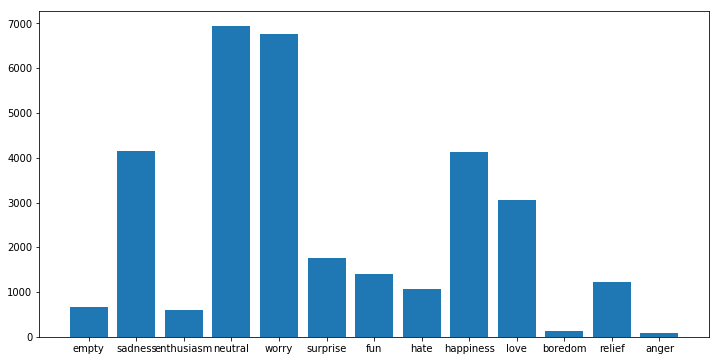

In [17]:
import matplotlib.pyplot as plt
xx=[]
yy=list(y_plot)
for i in range(len(x_plot)):
    xx.append(i)
fig = plt.figure(figsize=(12,6))
plt.bar(xx, yy, align='center')
LABELS=list(x_plot)
plt.xticks(xx, LABELS)
plt.show()

Para ayudar a la comprensión, se presentan igualmente 20 tweets del dataframe de entrenamiento (desde el 10 hasta el 30) 

In [18]:
df[10:30]

tweet_id sentiment           author  \
10  1956969456   neutral       feinyheiny   
11  1956969531     worry     dudeitsmanda   
12  1956970047   sadness         Danied32   
13  1956970424   sadness          Samm_xo   
14  1956970860  surprise     okiepeanut93   
15  1956971077   sadness           Sim_34   
16  1956971170      love     poppygallico   
17  1956971206   sadness  brokenangel1982   
18  1956971473     worry            LCJ82   
19  1956971586   sadness          cleepow   
20  1956971981     worry    andreagauster   
21  1956972097       fun    schiz0phren1c   
22  1956972116   neutral            jansc   
23  1956972270     worry        sweet8181   
24  1956972359   sadness   xamountoftruth   
25  1956972444     worry       jomama6881   
26  1956972557   sadness       LilithGaea   
27  1956972884     worry      oONEPTUNEOo   
28  1956973598   sadness  username_origin   
29  1956973690     worry    catchtheapple   

                                              content  
10                                   cant fall asleep  
11                            Choked on her retainers  
12  Ugh! I have to beat this stupid song to get to...  
13  @BrodyJenner if u watch the hills in london u ...  
14                                       Got the news  
15      The storm is here and the electricity is gone  
16                               @annarosekerr agreed  
17  So sleepy again and it's not even that late. I...  
18  @PerezHilton lady gaga tweeted about not being...  
19  How are YOU convinced that I have always wante...  
20  @raaaaaaek oh too bad! I hope it gets better. ...  
21  Wondering why I'm awake at 7am,writing a new s...  
22  No Topic Maps talks at the Balisage Markup Con...  
23  I ate Something I don't know what it is... Why...  
24  so tired and i think i'm definitely going to g...  
25  On my way home n having 2 deal w underage girl...  
26  @IsaacMascote  i'm sorry people are so rude to...  
27  Damm servers still down  i need to hit 80 befo...  
28  Fudge.... Just BS'd that whole paper.... So ti...  
29      I HATE CANCER. I HATE IT I HATE IT I HATE IT.

En vista del desbalanceo intuitivo de las emociones se considerarán como positivas igualmente todo aquel tweet cuya emoción ponderante sea 'neutral' pues no representa una emoción negativa y de este modo se lograrán balancear las etiquetas.

In [19]:
positive= ['enthusiasm', 'fun', 'happiness', 'love', 'relief', 'neutral']
negative= ['empty', 'sadness', 'worry', 'surprise', 'hate', 'boredom', 'anger']
positive_by_class = {'enthusiasm':0, 'fun':0, 'happiness':0, 'love':0, 'relief':0, 'neutral':0}
negative_by_class = {'empty':0, 'sadness':0, 'worry':0, 'surprise':0, 'hate':0, 'boredom':0, 'anger':0}
total_posit=0
total_negat=0
for i in LABELS:    
    if i in positive:
        total_posit+=yy[LABELS.index(i)]
        positive_by_class[i] += yy[LABELS.index(i)]
    else:
        total_negat+=yy[LABELS.index(i)]
        negative_by_class[i] -= yy[LABELS.index(i)]
print ("Número de registros con emociones positivas: ", total_posit)
print ("Número de registros con emociones negavivos: ", total_negat)

Número de registros con emociones positivas:  17349
Número de registros con emociones negavivos:  14626


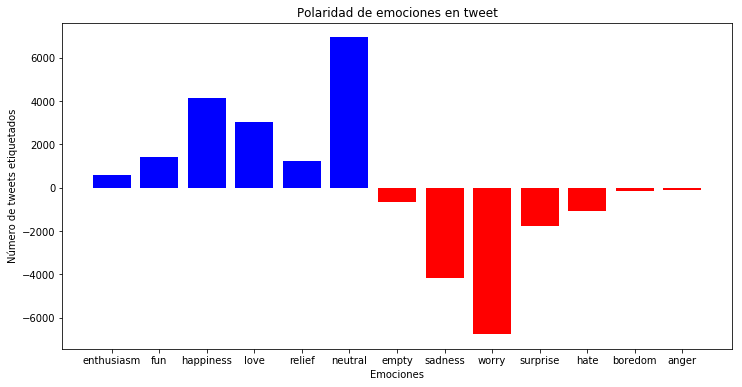

In [93]:
x_plotP= list(positive_by_class.keys())
y_plotP= list(positive_by_class.values())
x_plotN= list(negative_by_class.keys())
y_plotN= list(negative_by_class.values())
xs_plot = x_plotP+x_plotN
ys_plot= y_plotP+y_plotN
xx2= []
yy2=ys_plot
for i in range(len(xs_plot)):
    xx2.append(i)
fig = plt.figure(figsize=(12,6))
plt.bar(xx2, yy2, align='center', color=['blue', 'blue','blue', 'blue','blue', 'blue', 'red','red','red','red','red', 'red', 'red'])
LABELS=list(xs_plot)
plt.xticks(xx2, LABELS)
plt.title("Polaridad de emociones en tweet")   
plt.xlabel("Emociones")  
plt.ylabel("Número de tweets etiquetados")   

plt.show()

Así entonces, se procede a construir el vector 'classifications' que contiene las etiquetas de cada tweet de la forma 1 o -1 para las emociones positivas y negativas respectivamente.

In [21]:
classifications=[]
for i in emociones:
    if i in positive:
        classifications.append(1)
    else:
        classifications.append(-1)

print (classifications[:20])

[-1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1]


In [22]:
tweets_cleaned[:20]

['know was listenin bad habit earlier and started freakin his part ',
 'layin bed with headache ughhhh waitin your call ',
 'funeral ceremony gloomy friday ',
 'wants hang out with friends soon ',
 'want trade with someone who has houston tickets but one will ',
 'pinging why didn you prom didn like friends ',
 'should sleep but not thinking about old friend who want but married now damn amp wants scandalous ',
 'hmmm down ',
 'charlene love miss you ',
 'sorry least friday ',
 'cant fall asleep ',
 'ugh have beat this stupid song get the next rude ',
 'watch the hills london will realise what tourture because were weeks and weeks late just watch itonlinelol ',
 'got the news ',
 'the storm here and the electricity gone ',
 'how are you convinced that have always wanted you what signals did give off damn think just lost another friend ',
 'wondering why awake 7am writing new song plotting evil secret plots muahahaha damn not secret anymore ',
 'topic maps talks the balisage markup conf

### Método alternativo: Clasificación de emociones positivas y negativas automática

A continuación se presenta un método diferente para la determinación de la polaridad de un tweet haciendo uso de la libreria **nltk**. 

Se peropone utilizar el método SentimentIntensityAnalyzer() que obtiene la polaridad de cierto texto retornando la tasa de negatividad, positividaqd o neutralidad del texto.

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

/etc/Anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Se presenta un ejemplo del funcionamiento del método:

In [24]:
print (sid.polarity_scores('you re ugly'))
print (sid.polarity_scores('you'))
print (sid.polarity_scores('re'))
print (sid.polarity_scores('ugly'))

{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5106}


Teniendo esto en consideración, se propone la siguiente clasificación de los tweets (como clase positiva o negativas a 1 y -1 respectivamente)

In [25]:
positivos=0
negativos=0
for i in tweets_cleaned:
    sentencia_preprocesada = i
    result=sid.polarity_scores(sentencia_preprocesada)
    print (sentencia_preprocesada, "\n", result)
    print ("")
    if result['neg']<result['pos']:
        positivos+=1
    else:
        negativos+=1

print (positivos)
print (negativos)

know was listenin bad habit earlier and started freakin his part  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.5423}

layin bed with headache ughhhh waitin your call  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

funeral ceremony gloomy friday  
 {'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.4767}

wants hang out with friends soon  
 {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.4767}

want trade with someone who has houston tickets but one will  
 {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.0387}

pinging why didn you prom didn like friends  
 {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.6808}

should sleep but not thinking about old friend who want but married now damn amp wants scandalous  
 {'neg': 0.303, 'neu': 0.483, 'pos': 0.214, 'compound': -0.5267}

hmmm down  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

charlene love miss you  
 {'neg': 0.205, 'neu': 0.256, 'pos': 0.538, 'compound': 0.5574}

sorry lea


awake anybody else awake wish lived the since all the fun happens when asleep  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.7184}

charle with the power out lol damn savemart lost power and could not buy beer  
 {'neg': 0.253, 'neu': 0.606, 'pos': 0.141, 'compound': -0.296}

heehee love you tired  
 {'neg': 0.319, 'neu': 0.22, 'pos': 0.462, 'compound': 0.3182}

mobile phone refuses charge either the battery broken the chargerrr booooo  
 {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.4767}

how wish you would get her sign something then send let call you when you meet something  
 {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}

hmmm thought were sleeping too bad can see those videos until tomorrow night  
 {'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.5423}

morning everyone sorry for going early last night had bad news felt totally crap today new day  
 {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.7713}

went the beach and start

maybe should take drinking again feel have massive hangover still not yself today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have really bad head ache gon bed might back maybe not bye bye  
 {'neg': 0.377, 'neu': 0.623, 'pos': 0.0, 'compound': -0.7688}

friends from traveller tales held farewell party for but kinda disappointed them that would still here until sep fault  
 {'neg': 0.278, 'neu': 0.573, 'pos': 0.149, 'compound': -0.6554}

night not talking victor bored night now grrrr hate this shit  
 {'neg': 0.448, 'neu': 0.45, 'pos': 0.102, 'compound': -0.7984}

ooh maggi goreng yums cant eat sore throat cmin  
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.2755}

morning hon what you having for breakfast cant decide  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

should sleeping lost voice couple day ago  
 {'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.3182}

was too sleepy earlier and didnt get see matt  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0

complicated with dream  
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.25}

ahhhhhhh excited for july 21 ecxept stupid australia won get til like decembbberrrrrrrr but stilll ahhh congratss  
 {'neg': 0.105, 'neu': 0.619, 'pos': 0.276, 'compound': 0.3818}

had awesome time got2meet brandon rhyder unfortunatly can sleep tomorrow back the ole job got game face  
 {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.6249}

pandora hitten hard why can real radio play great music like this  
 {'neg': 0.076, 'neu': 0.435, 'pos': 0.489, 'compound': 0.8225}

2orw nooooooo want back newcastle  
 {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.0772}

had fun tonight leave you with this brandi carlile will dallas today should just sneak into the show  
 {'neg': 0.059, 'neu': 0.78, 'pos': 0.161, 'compound': 0.4767}

bout watch notorious cause that how feelin now wish could eat something but can surgery tomorrow food til saturday  
 {'neg': 0.094, 'neu': 0.817, 'pos': 0.089, 'compoun

really ultra bored  
 {'neg': 0.543, 'neu': 0.457, 'pos': 0.0, 'compound': -0.3353}

waaaahhh sad let know when next down this way  
 {'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'compound': -0.4767}

holy cute dexter has already lost his kitten face gettin chunky butt since got back from qld too haha  
 {'neg': 0.095, 'neu': 0.658, 'pos': 0.247, 'compound': 0.5719}

bucky ferret officially has insulinoma now daily prednisone had interview with doc today have back monday for testing  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

aww that last one roo oop  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

actually prefer rum gin but don have have any preferred them too much previously  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awwww writing resume too difficult how tell them taken 10 different jobs and quit them within the span two months  
 {'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.3612}

hmmm should have looked little more methinks  
 {'neg':

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

tired  
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}

grrr why can fall asleep  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.1027}

head hurts  
 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

just managed stab piece bhuja hot course into the roof mouth blood everywhere well least mouth  
 {'neg': 0.191, 'neu': 0.704, 'pos': 0.106, 'compound': -0.4019}

jealous his family their all having amazing breakfast and all get rice crispies  
 {'neg': 0.169, 'neu': 0.618, 'pos': 0.213, 'compound': 0.2023}

what can believe  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

taking the souls your friends and family and watching them die nightmare trust  
 {'neg': 0.192, 'neu': 0.493, 'pos': 0.315, 'compound': 0.3612}

ugg unpacking sucks  
 {'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}

thinks coast capital sent her work number telemarketers  
 {'neg': 0.0, 'neu': 0.843, 'pos'

will never forgive you for burying the erotica you snuffing out our love  
 {'neg': 0.107, 'neu': 0.647, 'pos': 0.247, 'compound': 0.5245}

had fix bike chain the way work arrived filthy bloody mess lovely weather though  
 {'neg': 0.267, 'neu': 0.545, 'pos': 0.188, 'compound': -0.1531}

have you seen who knocked you off top spot wefollow for perth  
 {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.2023}

really want see quot quot  
 {'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.1513}

nuhhhh info ticketek yet heaps excited though dont care how much but hope isn too much  
 {'neg': 0.089, 'neu': 0.638, 'pos': 0.273, 'compound': 0.577}

just called toyota car won ready til  
 {'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'compound': 0.7351}

finally going home but didnt get finish all work ill back tomorrow  
 {'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.5719}

dear not fun  
 {'neg': 0.429, 'neu': 0.159, 'pos': 0.413, 'compound': -0.0263}

because twitter about be

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the emergency room with cousin she got mad flu and can walk breathe why are hospitals always cold  
 {'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.8126}

just got finished watching marley and and cried like fucking baby missing beast like crazy  
 {'neg': 0.333, 'neu': 0.445, 'pos': 0.222, 'compound': -0.3566}

phone passed away yesterday jumped off the table searching for new phone  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

god twitter feed has been taken over geeky stuff funny wish understood  
 {'neg': 0.092, 'neu': 0.462, 'pos': 0.445, 'compound': 0.7269}

try having your best writing five years behind you heh happens  
 {'neg': 0.108, 'neu': 0.608, 'pos': 0.284, 'compound': 0.5574}

haha agree lame another thought are their concerts expensive that kinda lame too  
 {'neg': 0.279, 'neu': 0.448, 'pos': 0.274, 'compound': -0.0258}

tummy bugs are lame got about hours sleep that  
 {'neg': 0.259, 'neu': 0


just got skyfire firts impressions looks good but little too memory hungry for ageing htc tytn  
 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.34}

the 2009 convention doesn look that great this year going vegas then sounds much more fun  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.8268}

then has gone down estimation  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awake and can sleep feeling sick yuck  
 {'neg': 0.337, 'neu': 0.51, 'pos': 0.153, 'compound': -0.4215}

allergic cats tonsils get swollen and they hurt what dooo  
 {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.6808}

phaket what did anneliese want  
 {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.0772}

fall asleep and didnt get see the jonas brothers web cast still tierd  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sleepover the shit love those guy totally forgot they played tonight  
 {'neg': 0.197, 'neu': 0.438, 'pos': 0.365, 'compound': 0.4703}

bought ne

 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.9153}

looking for photo inspiration but everything want required more space than have  
 {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.3919}

horrible appraising peer work what are these americans thinking when they compose poems maybe the one with the problem  
 {'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'compound': -0.7351}

agh freaking out about going wales already not packed  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.4215}

you poor thing hang there xxx luf joe  
 {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}

the girl the hair salon asked quot shall trim your eyebrows quot how old feel  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

overslept headache  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

deucie picked his sitter for the weekend  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

raaaaaaaaaaagh early morning and its not even early must leave for work

made dentist appointment 9th june feel sick and nervous already however ibprofen paracetemol and codeine are friends sigh  
 {'neg': 0.229, 'neu': 0.593, 'pos': 0.178, 'compound': -0.296}

dreamt someone committed suicide drip stand  
 {'neg': 0.425, 'neu': 0.377, 'pos': 0.198, 'compound': -0.5267}

you not gon paint well  
 {'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'compound': -0.2057}

did not twitt yesterday cause was very busy day but back tomorrow btw can not sleep like zombie mode  
 {'neg': 0.129, 'neu': 0.871, 'pos': 0.0, 'compound': -0.395}

think that studying has really started taking its toll  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

not looking forward working over the next days come next sunday may may not dead  
 {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.5334}

why early  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the with phone service yea and still sick cough sniff  
 {'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.5106

 {'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.3384}

seeeeeeeeed tengo sed  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

know but maybe then you will have forgotten about and will like christmas july  
 {'neg': 0.134, 'neu': 0.682, 'pos': 0.185, 'compound': 0.2263}

finally beautiful sunny day atlanta too bad stuck inside working  
 {'neg': 0.302, 'neu': 0.33, 'pos': 0.368, 'compound': 0.296}

working still sick  
 {'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}

missed fma  
 {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}

forget how much miss tribe til have limited access talking them spotty internet the country won here long  
 {'neg': 0.234, 'neu': 0.606, 'pos': 0.16, 'compound': 0.0772}

seriously screwed haven studied all  
 {'neg': 0.62, 'neu': 0.38, 'pos': 0.0, 'compound': -0.5994}

nervous and wants things dealt with already sucks having important life stuff the air  
 {'neg': 0.264, 'neu': 0.632, 'pos': 0.103, 'compound': -0.4


didnt devos hopefully day doesnt suck because  
 {'neg': 0.234, 'neu': 0.517, 'pos': 0.249, 'compound': 0.0382}

delays cancellations really bite have had fair share and can sympathize hang tough  
 {'neg': 0.094, 'neu': 0.625, 'pos': 0.281, 'compound': 0.4588}

deh wish the deal was when bought macbook december but least got 100 bucks off  
 {'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.2144}

gen casey ready fight war against north korea the war pigs are getting excited again  
 {'neg': 0.411, 'neu': 0.395, 'pos': 0.194, 'compound': -0.7579}

the bee busy talk his buddy yahoo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

man don know they been there few months and actually almost cries when speakin back her sad  
 {'neg': 0.269, 'neu': 0.731, 'pos': 0.0, 'compound': -0.6712}

back home had great time  
 {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}

the sun shining the sky facking blue teletubbies have fucking work  
 {'neg': 0.0, 'neu': 1.0, 'pos

 {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}

wow drive done rappers mad they were kicked out spiros  
 {'neg': 0.213, 'neu': 0.533, 'pos': 0.253, 'compound': 0.1531}

hate history coursework sooo much  
 {'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'compound': -0.5719}

friday the new thursday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

modem has been offline for week now god bless the 3g network tim just left again may schedule has been brutal  
 {'neg': 0.204, 'neu': 0.618, 'pos': 0.178, 'compound': -0.1779}

watching french open tennis sad see venus make early exit this morning  
 {'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.4767}

wants sit park but should really painting the bathroom  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going funeral today for friend and classmate who died car wreck last friday  
 {'neg': 0.425, 'neu': 0.425, 'pos': 0.151, 'compound': -0.7003}

whenever rains hard get motivated  
 {'neg': 0.189, 'neu': 0.40


just paid bills now have money  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yes have copyright exemption apparently trying ensure the rest the world doesn have sccr18  
 {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.6486}

want know who that tried ask kia but still not reply but now change his status away  
 {'neg': 0.139, 'neu': 0.8, 'pos': 0.061, 'compound': -0.3506}

warhammer 40k space marines officially announced only for 360 and ps3 luck for gamers  
 {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.4588}

waiting patiently out tonight lonesome  
 {'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.3612}

nomatter how much sleep still tired  
 {'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.4404}

looking out the window beautiful blue sky great forecast for the weekend not good for cinemas  
 {'neg': 0.103, 'neu': 0.555, 'pos': 0.342, 'compound': 0.7646}

back the dentist today all want bask the sun  
 {'neg': 0.0, 'neu': 0.86, 'pos': 0.14


missing ontario  
 {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}

why not its the most retarded thing someone could their 16th and you know like retarded  
 {'neg': 0.34, 'neu': 0.554, 'pos': 0.106, 'compound': -0.7569}

cleaning and packing  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

very very tired  
 {'neg': 0.634, 'neu': 0.366, 'pos': 0.0, 'compound': -0.5379}

hate the biatches this world  
 {'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'compound': -0.5719}

the newest versions are not any better  
 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.3412}

early knee throbbing maker faire 99 out now possibly califur too same torn ligament before think insurance tho  
 {'neg': 0.105, 'neu': 0.895, 'pos': 0.0, 'compound': -0.25}

that sucks did you save any  
 {'neg': 0.258, 'neu': 0.412, 'pos': 0.33, 'compound': 0.1779}

gah the sunlight bright today giving headache resorted wearing new sunglasses  
 {'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'compound':

breaking news shares are currently trading below 00 only 88 per share  
 {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.5267}

had blood test today wasn too bad really needed dash starbucks after revive spirits with nice iced latte amp bun yum  
 {'neg': 0.131, 'neu': 0.674, 'pos': 0.195, 'compound': 0.1779}

bum hurts  
 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

sensors don seem want last for more than days  
 {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.0772}

hey hey only finishing the 10th june  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

first all love your picture picture whore amp the boyfriend jackie fml why haven you embraced the phone amp  
 {'neg': 0.169, 'neu': 0.667, 'pos': 0.165, 'compound': -0.0258}

really wanted that gig tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

want see drag hell but get the feeling none friends will  
 {'neg': 0.46, 'neu': 0.364, 'pos': 0.176, 'compound': -0.6889}

hope morning


well there peace corps prospects  
 {'neg': 0.0, 'neu': 0.204, 'pos': 0.796, 'compound': 0.7783}

work all day  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

kiss can find youtube only the concert versions help  
 {'neg': 0.0, 'neu': 0.56, 'pos': 0.44, 'compound': 0.6705}

still haven figured out what with them sadly take some more research before know what what  
 {'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'compound': -0.4215}

great  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}

wishes could with that special someone  
 {'neg': 0.0, 'neu': 0.482, 'pos': 0.518, 'compound': 0.5106}

forgot how much hate pizza delivery and manalapan and marlboro scum  
 {'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.5719}

job sucks  
 {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.3612}

sorry missed  
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3612}

hate that stinkin tired everyday hard get thought was supposed start getting energy back now  
 {'neg':


ive totally not got that job can just tell  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

didn see last night well but have watch theaters that must  
 {'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.1406}

three most hated words are quot see you monday quot  
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.6697}

just been out try catch swarm gone into roof gable end set bait hive hoping for the best the moment  
 {'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compound': 0.7906}

ughhh seriously hung over  
 {'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'compound': -0.1779}

extremely bored  
 {'neg': 0.705, 'neu': 0.295, 'pos': 0.0, 'compound': -0.3384}

why fucking cold  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

miss your dance friends too  
 {'neg': 0.208, 'neu': 0.39, 'pos': 0.403, 'compound': 0.3612}

kayla amp went visit you but they wouldn let school  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the computer work hates have call tech s


its been fun afternoon for trying though bbq out now though feeling bit sick  
 {'neg': 0.173, 'neu': 0.576, 'pos': 0.251, 'compound': 0.128}

too hate computer much  
 {'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}

sinus headaches suck big time  
 {'neg': 0.42, 'neu': 0.58, 'pos': 0.0, 'compound': -0.4404}

think that boat sailed friend the few cco that had them had them months ago wish you luck though  
 {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.836}

surprise its soooo funny thanks today btw lebron harassed  
 {'neg': 0.213, 'neu': 0.305, 'pos': 0.482, 'compound': 0.5267}

snap just broke windshield while replacing wiper blades  
 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.4215}

know love nicholas braun amp think make okay cameron but don wan see either  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4678}

damn being broke the day guitar hero metallica comes out boooooooo  
 {'neg': 0.322, 'neu': 0.468, 'pos': 0.211, 'compound':


went get car inspection sticker got gigantic red one just keep piling can take don worry about  
 {'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.4404}

tummy hurts  
 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

laundry instead sitting here that darn laundry keeps mocking  
 {'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.4019}

lucky been beggin for jury duty for years they dont ever send notices just notices for other people address  
 {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.4215}

have headache  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lost without laptop and break again for today made even worse that the big bosses skipton showed today  
 {'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.6597}

chris and cant get mine keep getting error  
 {'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'compound': -0.4019}

math amazing and hell the same time socialily that the naiv part fine  
 {'neg': 0.228, 'neu': 0.495, 'pos': 0

big header folio has been hours sales yet really impatient lol  
 {'neg': 0.171, 'neu': 0.618, 'pos': 0.211, 'compound': 0.1494}

reaaally need you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

that sucks  
 {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.3612}

lol funny thing don even know what class even race half the people our group are yes that clueless  
 {'neg': 0.097, 'neu': 0.579, 'pos': 0.324, 'compound': 0.7096}

marly sorry hope you find her soon  
 {'neg': 0.141, 'neu': 0.543, 'pos': 0.315, 'compound': 0.3818}

someone broke into car big time having really bad day  
 {'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.7645}

the signal that makes your internet quot quot pretty bad getting tech out will get that fixed though  
 {'neg': 0.154, 'neu': 0.705, 'pos': 0.141, 'compound': -0.0772}

have you guys heard about the flu that been going around swine flu hope you guys are safe there been deaths already  
 {'neg': 0.179, 'neu': 0.621, 'pos': 0.2, 

didn realize its 830 well already work today still the car don ask  
 {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.2732}

don have ticket boyfriend isn that into them might rain and budget boo tho  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

damn that lot messages from him how sweet quot and yeah sayang  
 {'neg': 0.16, 'neu': 0.533, 'pos': 0.308, 'compound': 0.3612}

you know your neck jacked when you are forced pay for parking you can turn you head parallel park the free spaces  
 {'neg': 0.165, 'neu': 0.712, 'pos': 0.124, 'compound': -0.0258}

forgot wish sister happy birthday yesterday  
 {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.7506}

miss you guys  
 {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.1531}

goodbyes hurt  
 {'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'compound': -0.5267}

welcome public transport  
 {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}

computer broken  
 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound

 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4588}

starving and alyssa mom would bring her subway  
 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.4215}

really wish someone would make groupchat theme for adium suited for irc ymous has way too low contrast  
 {'neg': 0.1, 'neu': 0.759, 'pos': 0.142, 'compound': 0.2247}

saw black snake the garden went back for picture and was gone  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

has new headphones but mp3 player yet  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

was fine was still playing infamous sorry hear how things ended again  
 {'neg': 0.094, 'neu': 0.647, 'pos': 0.259, 'compound': 0.3182}

having trouble syncing iphone work exchange email help  
 {'neg': 0.237, 'neu': 0.526, 'pos': 0.237, 'compound': 0.0}

hanging out the san fran airport got few hour wait until anywhere btw sfo wifi garbage  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

cheshire cat  
 {'neg': 0.0, 'neu': 1.0


wish could lay out the sun have garden lol  
 {'neg': 0.0, 'neu': 0.56, 'pos': 0.44, 'compound': 0.6705}

bored work  
 {'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}

girl ooc sorry keep missing each other  
 {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.3612}

just 16ï¿½c today amp cold wind want 2b like 25ï¿½ 30ï¿½ love hot weather but reaped the 1st strawberry yday  
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.5423}

don want warren die awesome character hate clare she should fucking die once and for all  
 {'neg': 0.412, 'neu': 0.394, 'pos': 0.194, 'compound': -0.7964}

now cant find him gon sleepless night tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

what about having one tampa been all excited the hunt but too far from any those cities  
 {'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.1779}

you far  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good all hanging out with dad 2day looking for job still 

 {'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.5642}

want outside and play the sunshine but have sit front computer all day least can have lunch the patio  
 {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.4497}

evenin tweeties phew been hot not that complaining walked miles into town today and felt all hot sweaty was nice tho  
 {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.5255}

just got busted the owner our company playing with squishy ball desk asked needed more work keep busy  
 {'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.2023}

don like when g1 changes feel like google should send email and tell all the things they gunna phone  
 {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.7506}

history  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

running for the past couple days due bad knee still guitar hero metallica arrived and has kept amused time rock  
 {'neg': 0.13, 'neu': 0.632, 'pos': 0.238, 'compound': 0.4404}

that actua

 {'neg': 0.235, 'neu': 0.526, 'pos': 0.239, 'compound': 0.0232}

weird trigger you should definitely ask him about them monday dude shitty  
 {'neg': 0.312, 'neu': 0.529, 'pos': 0.159, 'compound': -0.3818}

can wait that long  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

money honey hehe too soon sorry  
 {'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'compound': -0.0772}

sorry only just seen this how strange seems only happen from iphone perhaps problem with twitterific  
 {'neg': 0.309, 'neu': 0.691, 'pos': 0.0, 'compound': -0.5859}

one last stop chicago before going back miami  
 {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}

you are sooo lucky fiance away the marine corps haven even seen him yet  
 {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4215}

not looking forward driving this storm  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeah she screwed 3000 new tires new turbo and maint paid off and now she get almost nothing  
 {'neg': 0.1


just noticed didn get the location right again maybe way preview before sending would handy  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

allergies suck eyes even mor red than they were b4 think stay inside 2day  
 {'neg': 0.182, 'neu': 0.818, 'pos': 0.0, 'compound': -0.4404}

car shopping with kacy yay  
 {'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.5267}

pretty bored tried mom going home hour fixing leave aww she going texas for month  
 {'neg': 0.178, 'neu': 0.649, 'pos': 0.173, 'compound': 0.2263}

many tests todayyy don feel confident about anyy  
 {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}

gaba will take away not day shadez twpp  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wants eat entire chocolate cheesecake  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

jon amp kate kids attracted huge audience tabloid headlines and now state labor investigation  
 {'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.6249}

b


ohh would def give but tht was kenyatta cam not mine sry but want tht pic  
 {'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.1154}

and wtf little year old wan thugs ugh why can everyone just friends and not cliques like back the old days  
 {'neg': 0.302, 'neu': 0.59, 'pos': 0.108, 'compound': -0.6818}

thanks girl like said willing take loss them just don want see them wasted  
 {'neg': 0.259, 'neu': 0.425, 'pos': 0.316, 'compound': 0.0516}

tiggerk still having upset tummy issues  
 {'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'compound': -0.3818}

jealous would love deer steak one the downsides having almost vegetarian and carnivore living together  
 {'neg': 0.149, 'neu': 0.644, 'pos': 0.208, 'compound': 0.296}

wish could deliver alcohol but state law prohibits  
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.2144}

checking out zensify iphone works fine but landscape typing  
 {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.1027}

video blogs anymore  
 {'neg

lost keys now waiting for dad iberville phail also fml  
 {'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.3182}

lol trialing for the most part florida trials come screeching halt over the summer have fun this weekend  
 {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.7269}

dont get love anymore  
 {'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'compound': -0.5216}

hairdye patch test has just smeared all over white duvet cover fucking cunts  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.6361}

its sunny outside and have one out and play with  
 {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.6369}

well learnt use machine yesterday not too confident yet though hand sewin for xxx  
 {'neg': 0.139, 'neu': 0.581, 'pos': 0.28, 'compound': 0.3964}

still waiting  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

even without the dressing they still over 500 calories love that flatbread  
 {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.6369}

was 


aww sorry honey that stinks  
 {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.3182}

the people are coming kill mouse monday have mixed emotions mean lives desk drawer  
 {'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.6908}

and sit here all own doing nowt hmmpfff lol have good night  
 {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.6908}

yeahh ryland was amazing but didn get hug off him booo suarez seemed bit off tbh but think just woken  
 {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.7615}

can you follow please  
 {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}

ate waaaay much candy today feel sick  
 {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.5106}

don want going cry all the way home  
 {'neg': 0.298, 'neu': 0.577, 'pos': 0.125, 'compound': -0.4215}

just eaten and feel extremely bloated now for the not fun part  
 {'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.4023}

have say find very hard selling etsy som


bach suggest pta for such alerts but pta generally stands for parent teacher association the amp might confuse tweeps  
 {'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.3291}

just got bit car accident poor patrick  
 {'neg': 0.554, 'neu': 0.446, 'pos': 0.0, 'compound': -0.7351}

home getting ready back work monday maternity leaves  
 {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}

grrrr cant even enjoy this utiful day have finish that damned essay for philosophy  
 {'neg': 0.303, 'neu': 0.697, 'pos': 0.0, 'compound': -0.6402}

mines ben slow since last night think might need reset  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lavish told diamond follow you and why aitn share the starburst  
 {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.5574}

beautiful nice day and stuck inside  
 {'neg': 0.171, 'neu': 0.256, 'pos': 0.573, 'compound': 0.6908}

got ewrt outline then tennis then work need more time  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'com

 {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.5719}

ooo goddddd vodafone trouble network  
 {'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'compound': -0.4019}

started slimmer eight this morning still going hate that always want friggin password  
 {'neg': 0.231, 'neu': 0.688, 'pos': 0.081, 'compound': -0.5267}

the japanese exchange student the cutest thing ever seen seriously haha want put her pocket amp keep her  
 {'neg': 0.071, 'neu': 0.588, 'pos': 0.34, 'compound': 0.7506}

hospital uncle surgury after heart attack  
 {'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}

practicing piano ima wash whip later its all muggt out  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

stop itt  
 {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}

sugar free should have gone through stead grand they were good and grand bit too cheesy  
 {'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.9042}

having serious problems concentrating this press release this

cant found out alien one morning and aliens aren allowed but yayy congratses miss yew tew  
 {'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'compound': -0.2263}

battery going die  
 {'neg': 0.661, 'neu': 0.339, 'pos': 0.0, 'compound': -0.5994}

draven elbow met cement this afternoon looks nasty  
 {'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compound': -0.5574}

just had look endometriosis  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just wan better already  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

weird cause synced mine this morning and got the new episode  
 {'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.1779}

doesn work with the iphone yet love for the simplicity but need able sort tasks iphone useful  
 {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.7543}

and dee mack talking about your baby she almost all grown  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

whoo bgt really must multi task and art work the same time though ba

 {'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.296}

this day will pass slowly all these days will rawr  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dood they locked down your vimeo video  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

there point bein here one else  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have good time sadly that means probably gon have rain  
 {'neg': 0.204, 'neu': 0.584, 'pos': 0.212, 'compound': 0.0258}

morning dad had the weirdest dream some marines shot terrorists the throat didnt find the key yet  
 {'neg': 0.273, 'neu': 0.636, 'pos': 0.091, 'compound': -0.6124}

spending weekend doing nothing but being domestic you said  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

waiting for natie come online miss him  
 {'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.1531}

ugh soooo drag assing today but brighter note got g1 update amp the biznesssss  
 {'neg': 0.169, 'neu': 0.504, 'pos': 0.327, 'compou


dude kitty well aren you just absolutely special haha special think received new followers  
 {'neg': 0.0, 'neu': 0.468, 'pos': 0.532, 'compound': 0.8851}

have softball  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

temporary address not working either m8 they must have done something the domain  
 {'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.2584}

cal work hehe mind the gutter sittin here doin this student loan thing  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks for wishing luck couple weeks ago getting into higher choir but didn make  
 {'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.5267}

ditto that friend bored oops now have exciting problem  
 {'neg': 0.296, 'neu': 0.309, 'pos': 0.395, 'compound': 0.3818}

seriously need find out why laptop sometimes gets hot bbl after errands amp pricing quot comp fixes quot not many places left that  
 {'neg': 0.072, 'neu': 0.928, 'pos': 0.0, 'compound': -0.1779}

when someone edit your designs


need something gon have ice cream then water the plants then get ready for softball have plan  
 {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.3612}

sending healthy healing thoughts the mumborg direction  
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}

think you need define what you mean clue won wwdc this year  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.5719}

new york from 1500ft looks rather good last night the big apple  
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}

the best day ever met the greatest 10 year olds but will never see them again ahh miss them saw them hour sad  
 {'neg': 0.2, 'neu': 0.628, 'pos': 0.172, 'compound': -0.2144}

aww had one yesterday they suck  
 {'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.4404}

thanks for your support kept updating helps  
 {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.802}

didn have camera with totally regretting now  
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.


enjoying beautiful day off hanging around the house pam making cake but she won give any  
 {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.8658}

wish was home bed naked  
 {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}

aww bless her give her chance  
 {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.5859}

off work about what don know exhausted  
 {'neg': 0.294, 'neu': 0.706, 'pos': 0.0, 'compound': -0.3612}

yay out but have ride home have take tha yellow limo super gay  
 {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.8201}

fucking miss that band much  
 {'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'compound': -0.2247}

got hope get off work time for want job  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4939}

miss hubby already  
 {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.1531}

just too busy these days twitter blog  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

4am hubby alarm song playing was quot blame the 

 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

really hope  
 {'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4927}

not feeling well going sleep now  
 {'neg': 0.443, 'neu': 0.557, 'pos': 0.0, 'compound': -0.2924}

lmao was just thinking how fucking hate least people that following but haven unfollowed yet loon  
 {'neg': 0.132, 'neu': 0.739, 'pos': 0.129, 'compound': -0.012}

justcause summer hours say our day ends 1pm doesn mean really get leave  
 {'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compound': -0.1226}

feeling tempted high volume jeeps start quot acura wave quot too  
 {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.128}

brought cat specilist may ectopic uritors doing ultrasound surgury would 2000 may need take him back humane society  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hope for her sake she does could could get worse  
 {'neg': 0.221, 'neu': 0.571, 'pos': 0.207, 'compound': -0.0516}

once again spend the day studying bored st

anyone want stop carl and bring chicken club can barely walk  
 {'neg': 0.176, 'neu': 0.72, 'pos': 0.104, 'compound': -0.2263}

texting friends and being bored gosh hate rain  
 {'neg': 0.417, 'neu': 0.36, 'pos': 0.223, 'compound': -0.4019}

going the plum for the final happy hour amp they are finally closing their doors  
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}

dam wish celebs could frikken follow baaaaaaaaaaackkkkkkkk  
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}

don know how use this  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dang you now but got bounce like minutes just chilling the usual  
 {'neg': 0.08, 'neu': 0.694, 'pos': 0.226, 'compound': 0.4767}

the pool just not fun without tim  
 {'neg': 0.311, 'neu': 0.689, 'pos': 0.0, 'compound': -0.4023}

omg somethings spooky twitter  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks timmy turns out has strep and high fever  
 {'neg': 0.0, 'neu': 0.734, 'pos': 0.266,


are being douchie lol thats hilarious man have headache from the meeting  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.6705}

argh color jealous that rain asked for the other day still hasn gone away  
 {'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'compound': -0.4588}

just read article that buying doesn necessary mean get developement teams does that mean  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

jay leno last night jay you will missed  
 {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}

people work are stressing out  
 {'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.3612}

goin work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sittin through this boring ass conference call then get home nap missin alot  
 {'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'compound': -0.729}

omg just seen the sun and the moon the same place this disproves theory that they are the same person  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

boo

 {'neg': 0.304, 'neu': 0.588, 'pos': 0.108, 'compound': -0.4588}

judah too old for vegas  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

poor just going nap  
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

alive lol ooooo youre not here  
 {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.6597}

too  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

can find her favorite nike shorts  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4588}

why hot herrrre all sudden  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

arnold california aka the best place ever wish you could come with  
 {'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'compound': 0.7845}

sry about tweeting much  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

niece had learning yesterday she used computer had like hours sleep only was cranky and behaved like ass  
 {'neg': 0.149, 'neu': 0.638, 'pos': 0.213, 'compound': 0.128}

law rence amp why head feels like the s


sorry everybody apparently twitter isn sending updates  
 {'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.0772}

first fail cant tweet from phone how love work phone  
 {'neg': 0.223, 'neu': 0.51, 'pos': 0.268, 'compound': 0.1779}

sitting work watching the clock isn moving fast enough  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

aww bbq that not fair all had was chocolate  
 {'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.2411}

that sad trauma future serial killer  
 {'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'compound': -0.8807}

red top tabloids build knock down  
 {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.2023}

poor the flowers are fornicating with his nose now  
 {'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'compound': -0.4767}

ugh have hedache may cheap but fucking shit still have class with how roll  
 {'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.8042}

nah next week honey fault for confusin  
 {'neg': 0.451, 'neu': 0.549, 'pos'


ummmnnn ummmnnn good thanks for letting know earlier ate already  
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.7003}

wan wif boyfrannnnn  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

395 votes for hungary what but but the nurburgring  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

britain got good weather wish had some that over here  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6808}

what but but the nurburgring why good  
 {'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.5927}

what cant get onto bebo this one  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just saw with favorites and surprisingly was way too sad  
 {'neg': 0.205, 'neu': 0.464, 'pos': 0.331, 'compound': 0.2263}

have followers  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sad that gmail chat has died can help  
 {'neg': 0.465, 'neu': 0.347, 'pos': 0.188, 'compound': -0.6124}

aww man left all laffy taffy work  
 {'neg': 0.0, 'neu': 1.0, 'pos':

god cried much watch this guys from bgt  
 {'neg': 0.243, 'neu': 0.561, 'pos': 0.196, 'compound': -0.128}

saw you the facebook live chat but you will have answer question the next time  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lol don rub  
 {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4215}

got clean the bathroom today  
 {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}

feel like poop hate being sick  
 {'neg': 0.56, 'neu': 0.24, 'pos': 0.2, 'compound': -0.6705}

brown theres holy version hell lol cant stop need for trending topic nice whispering redmango lol  
 {'neg': 0.178, 'neu': 0.425, 'pos': 0.397, 'compound': 0.5702}

checked didn win  
 {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}

yes they can but the selection arbitrarily and severely limited because nonstandardized copyright laws  
 {'neg': 0.331, 'neu': 0.573, 'pos': 0.096, 'compound': -0.6705}

haha shaved all facial hair off except for moustache cause thought would


okay whats with twitter laptop completely broke and now computer acting dont reckon will for  
 {'neg': 0.172, 'neu': 0.723, 'pos': 0.106, 'compound': -0.2944}

feels all kinds not well right now  
 {'neg': 0.232, 'neu': 0.768, 'pos': 0.0, 'compound': -0.2057}

going 116 days still new tattoo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

god damn you twitter stop eating undeleted dms  
 {'neg': 0.408, 'neu': 0.417, 'pos': 0.175, 'compound': -0.4215}

getting excited for the weekend hang going all alone never mind excitement lost  
 {'neg': 0.257, 'neu': 0.5, 'pos': 0.242, 'compound': -0.0685}

hope ray please give him our love and hope returns soon hope its not too bad  
 {'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.952}

damn everyones nappin the beach wake and half the crew lol aww wish had cuddy buddy tho  
 {'neg': 0.122, 'neu': 0.631, 'pos': 0.248, 'compound': 0.4215}

thank guys much for helping out the followers thing but probably not gon win cause dont ha

marlees doc appointment poor babygirl has get shots  
 {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}

sore head hope girls  
 {'neg': 0.338, 'neu': 0.27, 'pos': 0.392, 'compound': 0.1027}

waters was until had home cause the presentation ended  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

shud realy bed proper tired cnt boverd  
 {'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'compound': -0.4404}

yeah wtf with that noggin doesn take either  
 {'neg': 0.317, 'neu': 0.5, 'pos': 0.183, 'compound': -0.3818}

that why need there represent the blackberries  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

would like able just one those  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}

can the movies today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bit down the dumps today such awful day maybe good time write song  
 {'neg': 0.306, 'neu': 0.538, 'pos': 0.156, 'compound': -0.4215}

fun who did you with another park invite lol  
 {'ne


totally agree she wasn even good the judges said wither just said make her feel better  
 {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.8221}

art party crazy artists such bit padestrian skanking  
 {'neg': 0.216, 'neu': 0.541, 'pos': 0.243, 'compound': 0.0772}

dinner smells good man hungry sunny outside wish was wonderland  
 {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.8126}

just wanted dippin dots  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dude feel really bad but doesn work don have serial for can used  
 {'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'compound': -0.3392}

lmfaaoooo just watched the pink video you know well love soooo lol  
 {'neg': 0.0, 'neu': 0.497, 'pos': 0.503, 'compound': 0.8442}

thanks bryan and don remind about the state budget issues actually steve only has staffers offices  
 {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4404}

sounds like town  
 {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}

headach

the dentist for hopes first check lets she how she handles dentist  
 {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.4215}

super bummed the whitecaps game plans with friends fell through now need home let the sitter  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.7906}

will sending you when get first check make enough lol have only worked like hours far  
 {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.6486}

dedicating the next hours cleaning the house  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

went the doctors for physical including blood work and the eye doctors for new glasses  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

skies you got singing falling love now only changing the week day saturday doesn quite fit  
 {'neg': 0.074, 'neu': 0.602, 'pos': 0.324, 'compound': 0.7501}

one day hugs will come fingers still crossed  
 {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}

just potted some geraniums then talked the 

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

guess missed out more than beer and good time  
 {'neg': 0.182, 'neu': 0.579, 'pos': 0.24, 'compound': 0.1779}

not looking forward next wednesday all  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

did you watch forgottenmost enjoyed seeing but paying for today face doesnt bounce back anymore  
 {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.2846}

tired going take nap finger hurts 143  
 {'neg': 0.423, 'neu': 0.282, 'pos': 0.296, 'compound': -0.2023}

okie gon tweet more because loosing you guys girls  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hate being reminded how weak eyes are overdid reading today they sore fuck going rest sigh  
 {'neg': 0.51, 'neu': 0.445, 'pos': 0.045, 'compound': -0.91}

still home goodness  
 {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}

daddy just left without  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

grandparents cat may die love that cat s


trips are soooo not fun when you sick  
 {'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.7186}

praying for you sorry hear about your bro man  
 {'neg': 0.12, 'neu': 0.648, 'pos': 0.231, 'compound': 0.296}

why love much why your make smile all the time why your special but cant have got scared try  
 {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.8079}

great pic have upload pix tomo laptop tonight  
 {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}

and brazil love you too  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

sunburned face amp legs fixing arms tooo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

friend sent call bck messages dunno you could reply but she has credit thts all  
 {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.6705}

just banged elbow and its bleeding owwiee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

was hours ago came and only now realised when went buy something online  
 {'neg': 0.0

think have h1n1 maybe just cold  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

really sad that shes missing critical mass  
 {'neg': 0.664, 'neu': 0.336, 'pos': 0.0, 'compound': -0.7841}

when told mom quot can watch quot she said quot quot little did know she thought asked quot what quot looks like have free friday  
 {'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.7003}

there gone now going home make sad leave the mall  
 {'neg': 0.35, 'neu': 0.65, 'pos': 0.0, 'compound': -0.5106}

and missed and miss the rpt 2mrw well there youtube sunday guess thanks andrew  
 {'neg': 0.202, 'neu': 0.532, 'pos': 0.266, 'compound': 0.296}

making imovie college  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

watching film recovering from operation  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

guess wasnt meant  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

smackdown lot more boring without maria  
 {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound


got overexcited about pizza and burned mouth  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sleep time for now lots last minute revision tomoro exam monday night tweet ers  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

another one those were taken met see have real sleeping disorder  
 {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.4019}

miss ris punking everytime hung out and effnng  
 {'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'compound': -0.1531}

dammit just locked the keys the car had call mama whos laughlin call aaa for  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

harley passed away december 2008  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

apparently haven tried the site tho maybe will get better results  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}

besties only was there twitpic  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

besties only was there twitpic besties only  
 {'neg': 0.0, 'neu': 1

craving coffee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wish could call you but will cost lot parents wont let  
 {'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.2144}

headed home dad duty tonight might take the kids the course again although boys took for 11 last night chipping contest  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

not going toronto anymore  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wants swimming  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the justice left when talent was voted off  
 {'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.7351}

brand new playing the epicenter july when jesse lacey why you hate  
 {'neg': 0.239, 'neu': 0.645, 'pos': 0.116, 'compound': -0.4404}

18 hours work cry can survive weeelcome wonderland sing along  
 {'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'compound': -0.4767}

know just got off the phone with them will leave giant hole mill regions also closed  
 {'neg': 0.074

sorry day sucked did see post abt car issues lol think safe say can only get better tho beer thirty  
 {'neg': 0.154, 'neu': 0.538, 'pos': 0.308, 'compound': 0.6486}

seriously want pug buy one  
 {'neg': 0.283, 'neu': 0.5, 'pos': 0.217, 'compound': -0.1027}

boo you can come over and watch telenovelas and braid each others hair  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hey tweeties auntie jus got bad car accident pls keep her yall prayers thanx  
 {'neg': 0.349, 'neu': 0.582, 'pos': 0.069, 'compound': -0.743}

really well want can 2gether next  
 {'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'compound': 0.4536}

think just found purse soulmate but its not budget  
 {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.3506}

poor bella the with her first and second ear infection since both ears are infected her screams were blood curdling  
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.8176}

not ready for this year end  
 {'neg': 0.297, 'neu': 0.703, 'pos': 0.0

why you not the twitters more bais  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

tmeme besties only was there twitpic besties  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

she forgot her words and then started crying and she stopped singing but then carried and then cried again she stopped  
 {'neg': 0.352, 'neu': 0.648, 'pos': 0.0, 'compound': -0.8047}

tummy hurts  
 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

went galveston want back  
 {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.0772}

you still have class ouch  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ohh ouch  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

flo one backup wives case renae gets abducted aliens russians but flo pregnant changes things  
 {'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'compound': -0.2846}

what wrong with debbie  
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

where were you wed night  
 {'neg': 0.0, 'neu': 1.0

 {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}

doing the same want travel little  
 {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.0772}

miss yoooooooooooooooooooou poia  
 {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.1531}

wowzer very windy not good for allergies  
 {'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'compound': -0.3959}

says raining again  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

very much disappointed with the angels and demons movie shame was great book  
 {'neg': 0.315, 'neu': 0.486, 'pos': 0.199, 'compound': -0.3353}

wish saturday night fever was again couldn stay lastnite for the whole thing  
 {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.4019}

95 degrees and crappy  
 {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5574}

drive 90mph daily basis cld film fast amp furious off but anything mph not forte bump anything  
 {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.3291}

going bed its gon 

 {'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.5023}

dont want ugly anymore  
 {'neg': 0.206, 'neu': 0.338, 'pos': 0.456, 'compound': 0.357}

home alone doing  
 {'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.25}

paramore makes want punch babies lol  
 {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.4767}

gets home here until 10 30  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

still there guess not want talk you  
 {'neg': 0.169, 'neu': 0.831, 'pos': 0.0, 'compound': -0.0572}

picture showing  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

last day school and last concert life wow can you say emotional really gon miss mhs had graduation practice today  
 {'neg': 0.077, 'neu': 0.7, 'pos': 0.222, 'compound': 0.5456}

pain shit  
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.7845}

what great project wish could have done that with dd1 she too old now  
 {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.7783}

awww shame that your all 

brittany moved  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

don wan single the rest life  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

mom her way home but yay for mother son days she even bought some new shoes haha  
 {'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.8625}

apologize for the trollcat crap misunderstood the concept  
 {'neg': 0.439, 'neu': 0.439, 'pos': 0.123, 'compound': -0.5574}

thhaanks wish too  
 {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}

bored cant habbo stupid ban  
 {'neg': 0.214, 'neu': 0.204, 'pos': 0.582, 'compound': 0.5574}

not sure didn say was big jst saw the pics last bday you looked pretty miss you  
 {'neg': 0.172, 'neu': 0.674, 'pos': 0.154, 'compound': 0.1625}

rigby well neck hurts from moving out you massage massage lol  
 {'neg': 0.194, 'neu': 0.5, 'pos': 0.306, 'compound': 0.2023}

all dressed showered and clean shaven and have nowhere friday night  
 {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'com

get you esplained awhile ago  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

missing her best friend and only saw them this afternoon how sad  
 {'neg': 0.256, 'neu': 0.386, 'pos': 0.357, 'compound': 0.4767}

didn work for except when used the word autofollow and got followed bot selling autofollow program  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

crack here mine just threw mouth lil bit legs lol  
 {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}

sorry what does that mean currently have world phone amp use apps confused  
 {'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.3818}

aww guess not that many people are online though  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

quot quot ub40 quot bring your cup quot quot quot  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

well phone today are waiting till june 9th get better deal sooooo but its all good  
 {'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'compound': 0.7469}

dont 

can believe preseason doesn start until august football with drawls  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

are pushing the gqmf trend tonight awesome woefully behind ontd startrek reading  
 {'neg': 0.161, 'neu': 0.595, 'pos': 0.244, 'compound': 0.34}

now can call your kitten its new name because ryan makes fun the way say kitten  
 {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.5106}

graduate 9am sunday june 14th  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

tht sucks know the feeling sorry let know the movie good  
 {'neg': 0.25, 'neu': 0.461, 'pos': 0.289, 'compound': 0.1531}

sorry but men sucks bad way  
 {'neg': 0.753, 'neu': 0.247, 'pos': 0.0, 'compound': -0.8462}

tuned listen but had 30 meeting now know that high school college french doesn cut anymore  
 {'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compound': -0.3919}

the engine car blew  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

3d with the boys grandpa had  
 {'neg': 0.0, 'n


guy would luv hear music too but iï¿½m out batteries the plays besides but think this some kind vampire movie  
 {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.7964}

hangin out with cousin holly and tlkin grandparents phone went dead  
 {'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'compound': -0.6486}

imagine you really were lost and lost all contact with that the saddest day life haha  
 {'neg': 0.379, 'neu': 0.497, 'pos': 0.124, 'compound': -0.7316}

traffic lame matter how hard try can get anywhere time movie yay  
 {'neg': 0.251, 'neu': 0.479, 'pos': 0.269, 'compound': 0.0772}

see that traffic northbound that commute  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

surprises not ready  
 {'neg': 0.421, 'neu': 0.2, 'pos': 0.379, 'compound': -0.0541}

this twitter driving nuts wont let download profile pic guess keep trying  
 {'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'compound': -0.3182}

apparently paige partying with rose jenn and adam again without child has such 

liked quot quit smoking september last year after 40 years hope one day won miss snivel whine quot  
 {'neg': 0.155, 'neu': 0.491, 'pos': 0.355, 'compound': 0.743}

very upset right now like can even formulate complete thought  
 {'neg': 0.216, 'neu': 0.597, 'pos': 0.187, 'compound': -0.101}

hope you get soon miss you and can wait see you again  
 {'neg': 0.11, 'neu': 0.69, 'pos': 0.2, 'compound': 0.3182}

hang with you but tennessee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

really ill atm  
 {'neg': 0.607, 'neu': 0.393, 'pos': 0.0, 'compound': -0.4754}

finally lost fm97  
 {'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.3182}

besties only was there twitpic besties only  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

131 miles away  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

standing ovation for wieters nobody was sitting down insane hit into double play though  
 {'neg': 0.158, 'neu': 0.702, 'pos': 0.14, 'compound': -0.0772}

shame ab

 {'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'compound': -0.7845}

sooo 20 just now findin out have asthma  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

back roseburg and empty apartment  
 {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.2023}

last day volleyball miss everyone already well banquet 10th hopefully everyones gon there  
 {'neg': 0.098, 'neu': 0.61, 'pos': 0.293, 'compound': 0.4939}

really wants see the script august but one will with  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you can please everybody  
 {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}

watched all online has the last episodes s5  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nvm just got message that sick  
 {'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'compound': -0.5106}

last heroes until sept sick amp drugged for past days says lacking everything esp get this sunshine  
 {'neg': 0.136, 'neu': 0.575, 'pos': 0.29, 'compound': 0.5789}

toontown down  
 {

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sad that aki out for the rest the season  
 {'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'compound': -0.4767}

upset friday night crying  
 {'neg': 0.74, 'neu': 0.26, 'pos': 0.0, 'compound': -0.6908}

420 why baby  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wants home and see erin  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have one the spring show with  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

june 15 1995 chino hills the day rained june socal had outside grad had move the gym  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awww hates wen families are brokun humuns maybee you see him agin wun day  
 {'neg': 0.182, 'neu': 0.818, 'pos': 0.0, 'compound': -0.4404}

guilt trips feeling sick pressure stress and too much drama  
 {'neg': 0.615, 'neu': 0.296, 'pos': 0.089, 'compound': -0.836}

someone fly reno  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lumiere not impressed

man just seen the bgt news not cool loved greg that dancing weepy kid was just fucking obnoxious imo  
 {'neg': 0.416, 'neu': 0.584, 'pos': 0.0, 'compound': -0.8658}

jealous slaving away the store and youre chilling the boat  
 {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.4767}

damnit all that sucks you were one the ones thought drag back lol  
 {'neg': 0.398, 'neu': 0.459, 'pos': 0.143, 'compound': -0.6124}

your schmoo moving are you sad  
 {'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}

had new work picture taken today hated looks too much like  
 {'neg': 0.268, 'neu': 0.573, 'pos': 0.159, 'compound': -0.4019}

want chat with you some day  
 {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.0772}

going cali like two weeks but nor cal  
 {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.1901}

home finally hungry needs food mad cause might not get pizza today hanging out with brandon its raining ugh  
 {'neg': 0.261, 'neu': 0.739, 'pos': 0.0, 'compo

bit new scientist this weeks last weeks and watership down  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

shots suuuuck done more vacines  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

omg someone just left voicemail work ffs let have day off  
 {'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.5859}

boo dlp sold out for 30  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bum today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

might bed nightmares about bad grades tonight please hmm  
 {'neg': 0.273, 'neu': 0.547, 'pos': 0.18, 'compound': -0.296}

environmental project  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

noes missed you again  
 {'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.296}

yeahh those two times stood next each other were special times  
 {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019}

just got dress for friends wedding its little tight places got work out more  
 {'neg': 0.0, 'neu': 0

got new sneaks today can wait break them stupid rain  
 {'neg': 0.274, 'neu': 0.726, 'pos': 0.0, 'compound': -0.5267}

stupid putet won let your chat  
 {'neg': 0.306, 'neu': 0.36, 'pos': 0.333, 'compound': 0.0772}

thanks for the shout out you might right about the starving thing little lol  
 {'neg': 0.146, 'neu': 0.573, 'pos': 0.282, 'compound': 0.3832}

unfortunatly just about start making way home but via singapore for gig too fun ain over just yet  
 {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.6652}

lotsa water already dark out  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sitting traffic while car gets rained just washed sunday doesn the weather know this california  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

missed the chicago show boo  
 {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}

ahhh slept through the game gon try best watch tomorrow though hope play army  
 {'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.8591}



welcome life  
 {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}

well even with her breakdown she was better than the other acts unfortunately britain got very little talent  
 {'neg': 0.099, 'neu': 0.579, 'pos': 0.322, 'compound': 0.6581}

lol just don ever forget  
 {'neg': 0.247, 'neu': 0.39, 'pos': 0.364, 'compound': 0.2263}

1st those who follow back 2nd grrr those who don cuz messes being able follow others want when 2000  
 {'neg': 0.071, 'neu': 0.863, 'pos': 0.066, 'compound': -0.0258}

cant get onto twitter the internet  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just very quick hello goodbye amp enjoy the party from this very tired blogger who unfortunately needs sleep beatwittyparty  
 {'neg': 0.211, 'neu': 0.566, 'pos': 0.223, 'compound': 0.079}

the beginning cater always gets  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

man can stop being freakin hungry  
 {'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'compound': -0.296}

poor wavves had m

watchin grease and waiting for hurry and come can talk girl ugh seems far away  
 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.4215}

that sucks tell your act like grown maybe stressed too  
 {'neg': 0.34, 'neu': 0.486, 'pos': 0.174, 'compound': -0.34}

all the shows are sold out have wait til tomorrow sunday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

boo used live upland have funnnn  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dunno like longer hair jensen  
 {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}

there loads highly qualified stuff and loads still using snail mail  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

know but won the same  
 {'neg': 0.0, 'neu': 0.442, 'pos': 0.558, 'compound': 0.7227}

theres nothing worse than working friday night and having wake saturday want babe  
 {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.4318}

10 yrs ago night like this have been drinking with workers then went home 

 {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.9216}

good idea about putting them ice cream  
 {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}

lol hear you think watched about different movies when should have been getting work done ttyl girl  
 {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.4215}

what cereal you usually like  
 {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}

had yay moment today yay hope you did too  
 {'neg': 0.0, 'neu': 0.382, 'pos': 0.618, 'compound': 0.8658}

mmmm chilli crab amp deal deal and thats life  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wish was eurodjangocon  
 {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}

endless streams tea holiday day here how know raining  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}

sounds like you all had great night glad was successful  
 {'neg': 0.0, 'neu': 0.309, 'pos': 0.691, 'compound': 0.9246}

goin bed  
 {'neg': 0.0, 'neu': 1.0


that what hah great thanks just waiting for all the craziness take off  
 {'neg': 0.133, 'neu': 0.51, 'pos': 0.357, 'compound': 0.6597}

good morning hazel caffeine shot  
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

realizing that don have school today tomorrow for the next few months really need get those job applications  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

our weekend was also great two friends julia were here for four days  
 {'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'compound': 0.802}

excited for the things for jay room arrive  
 {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.34}

bank holiday morning reading elle bed and getting excited for roast dinner sheering later  
 {'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.6249}

woohoo got the sunbeam cafï¿½ series grinder foods for only 198 epic win  
 {'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'compound': 0.7964}

really really wants and see coraline  
 {'neg': 0.0, 'neu': 1.0, 'p


need thank all just have keep the good thought  
 {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.6597}

just got back from the long weekend  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

what are you consultant for  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

watching horrible with don mad  
 {'neg': 0.691, 'neu': 0.309, 'pos': 0.0, 'compound': -0.7717}

glad you liked done loads arrangements but that was the only one could find blip  
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4404}

going glasgow  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

weekend over hope you all had great weekend  
 {'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.7906}

hello james who are you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hey thanks the advice amp support  
 {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6808}

morning  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sleepy tabz heading bed fun night li


hehe you right not daft may good month french contract  
 {'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.3412}

can you please have short stakc competition  
 {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.3182}

happy meal toy  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

that totally works too  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

chillin with the neighbor  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hey are you there oyy geas you sleep  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thought every weekend was long weekend california  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

really this time night have new song the week the morning  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

home  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

but the bright side school  
 {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.5927}

good luck how exciting  
 {'neg': 0.0, 'neu': 0.099,


why thank you ver much appreci fuckin ate the compliment level best you know can let mother down  
 {'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound': 0.8689}

can wait either your welcome yay  
 {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.7506}

non civilisation was pretty though  
 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4939}

what lisa sorta quiet usa gon crash soon  
 {'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'compound': -0.4019}

she does especially pink ones lol what beautiful creatures they are  
 {'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.7884}

ill have photo tomorrow kay  
 {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.4215}

haha good for you  
 {'neg': 0.0, 'neu': 0.253, 'pos': 0.747, 'compound': 0.7096}

good hear have feeling though the behind the scenes and being there better than what shown  
 {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.743}

bit soul time this mama will visialize next living environent speak s


hehe will never thorw out these shoes listening varsity fanclub surprise surprise sway sway baby awesome  
 {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8074}

good luck  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7096}

can come merci btw have always been inspired you since was teenager  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4939}

this what pundits are paid for how will channels and websites run otherwise  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

watching short stack  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thankyou short stack for bringing out second sydney show now going both thankful for you guys being good fans  
 {'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compound': 0.765}

couldn see one but probably blind you have link  
 {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.5499}

thanks for the raspberry laced vanilla cake  
 {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}

eating hawain pizza


thank you thank you was hoping the video will online  
 {'neg': 0.0, 'neu': 0.473, 'pos': 0.527, 'compound': 0.7783}

morning all happy star wars day may the 4th with you  
 {'neg': 0.221, 'neu': 0.552, 'pos': 0.227, 'compound': 0.0258}

watching you work exhausing just thinking about making sleepy  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

off for bit tweeet yall later  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

transcribing tenth and last report for the night  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

studying for exam tomorrow amp packin  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bingley just for that practise the proposal scene toward the end endearing  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

still here just changed avatar  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nice have fun although you cant not have fun lol  
 {'neg': 0.132, 'neu': 0.338, 'pos': 0.53, 'compound': 0.7946}

uploading lot

keith better now  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

you can get into canada but can wtf seriously not allowed cross the border  
 {'neg': 0.377, 'neu': 0.623, 'pos': 0.0, 'compound': -0.8047}

excited that get add new listening exercise the site stay tuned  
 {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.34}

the car illusin kool  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

instant internet marketing empire bonus recoup your investment 24 hours less  
 {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.5423}

enough studying whew time for sleep  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

monday morning lots out just waiting for mate add style table and set  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

watch lowkey freestyling and selling his mixtape and performing norwich tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

boys are stupid throw rocks them  
 {'neg': 0.405, 'neu': 0.595, 'pos

 {'neg': 0.138, 'neu': 0.652, 'pos': 0.21, 'compound': 0.25}

cant send the dream story twitter sending bebo mail  
 {'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.1877}

ohh know her from church she got into mcfly  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

organised day indulgence amp luxury for her pamper day fingers crossed she likes the surprise  
 {'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.5994}

lookin for work via online watchin shaycarl latest vlog entry youtube and textin lady friend beds calling name though  
 {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.4939}

can get this way call  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wonder your running son  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

answering email questions for art photography show yes actually reply entry deadline may 22nd  
 {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}

and may the source with you  
 {'neg': 0.0, 'neu': 1.0,

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

muhahaha you joined the tweet cult lol heya btw twitterific good iphone app use  
 {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.6908}

eating chocolate ready break  
 {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}

welcome  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}

and staff rooms will intersting see how k12 faces this when every kid has laptop  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yahoo volleyball hiking eating fish eye witnessing sleeping the beach jumping rocks amp hanging where jurassic park was filmed  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

look all this feedback you should more often seriously the crazier the topic the better  
 {'neg': 0.171, 'neu': 0.667, 'pos': 0.161, 'compound': 0.2075}

going sleep with horton goodnight twitterverse  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the website developing lets you also share videos do

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hey guys can ask what item did guys put for talent show such big fans both you whoo  
 {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.4215}

lalalaland why liking that song much anyhoo grr have cold but thank goodness though the sore throat has gone  
 {'neg': 0.119, 'neu': 0.548, 'pos': 0.333, 'compound': 0.705}

bom dia good morning guten morgen returning twitter  
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

any ideas tempat apa yang paling cocok jupiter seru juga  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

well that does make feel better about staying even later watch the daily show lay the guilt again  
 {'neg': 0.095, 'neu': 0.679, 'pos': 0.226, 'compound': 0.4404}

you know you love stat  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

yep actually hehe kathy  
 {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.296}

just arrived about 150 fellows can see girl  
 

got great expectations tomorrow gon awesome  
 {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.8481}

helloooo star wars day cool lool wen you cnaterbury then  
 {'neg': 0.259, 'neu': 0.576, 'pos': 0.165, 'compound': -0.3182}

well from the pic take you thats unlucky lmao  
 {'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.7184}

playing with cool new website hopefully ready very soon  
 {'neg': 0.0, 'neu': 0.35, 'pos': 0.65, 'compound': 0.8074}

lol grey skies far the eye can see which about 20 yards  
 {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4588}

just got home had major daily tset today its math and wish got more  
 {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}

wellity think ima gon clean room gay need read good book sense and sensibility here come beat the lily  
 {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.6808}

awesome pics love them btw still loving the amajanese takeover too  
 {'neg': 0.0, 'neu': 0.396, 'pos': 0.604, 'co

yay what are your plans for today seeing you wednesday and thursday  
 {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.5267}

haha gon follow dreams now well dream haha still reading over for the 90th time  
 {'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'compound': 0.8957}

achillies thanks and yay for being guild  
 {'neg': 0.0, 'neu': 0.442, 'pos': 0.558, 'compound': 0.743}

loves the way the sky looks now cloud all but that would only mean that ultra hot outside  
 {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.3291}

har har swineflu everywhere via  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hmph this nowhere near effective was few mins ago wonder was coincidence followers please report findings  
 {'neg': 0.135, 'neu': 0.743, 'pos': 0.122, 'compound': -0.0654}

borred what everyone doingn check out links profile  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

that then accept the slave role your wish command hahaha  
 {'neg': 0.0, 'neu': 0.44, 'p

 {'neg': 0.416, 'neu': 0.584, 'pos': 0.0, 'compound': -0.6908}

happy national star wars day everyone  
 {'neg': 0.319, 'neu': 0.354, 'pos': 0.327, 'compound': 0.0258}

love that well all mcr songs are great and happy star wars day yaa  
 {'neg': 0.135, 'neu': 0.337, 'pos': 0.528, 'compound': 0.8885}

hey chiclit whats happening just trying promote business really hard  
 {'neg': 0.138, 'neu': 0.651, 'pos': 0.212, 'compound': 0.228}

hope you aren allergic dust choc syrup  
 {'neg': 0.218, 'neu': 0.495, 'pos': 0.287, 'compound': 0.1779}

seriously increasingly good nights stoked life couldn happier goodnight  
 {'neg': 0.121, 'neu': 0.429, 'pos': 0.45, 'compound': 0.6808}

before forgot happy star wars day may the fourth with you  
 {'neg': 0.221, 'neu': 0.552, 'pos': 0.227, 'compound': 0.0258}

well all can pray for you  
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5267}

the best day ever birthday  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

looking fo

hello there taylor miss you its been months  
 {'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'compound': -0.1531}

that was flippin sweet dudes thanks for sharing  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.8503}

going see how long can this for  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeah ill make sure keep you updated get all delivered  
 {'neg': 0.196, 'neu': 0.49, 'pos': 0.315, 'compound': 0.1779}

you are way there lol wonder feels like snow  
 {'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.6486}

next time you are around please let and know and will take you for lunch too  
 {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}

and the first thing you did was get your twit  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

then anticipating the next ten days  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

morning all off sell million quids worth pproperty well hope owe you all drink commission  
 {'neg': 0.0, 'neu': 0.63

kinda done trying ugh well was worth the effort long day tomorrow night tweeters  
 {'neg': 0.145, 'neu': 0.627, 'pos': 0.228, 'compound': 0.1189}

mmmm yes please  
 {'neg': 0.0, 'neu': 0.167, 'pos': 0.833, 'compound': 0.6124}

jensara swann act model enjoyed shoot with jensara and friends yesterday  
 {'neg': 0.143, 'neu': 0.476, 'pos': 0.381, 'compound': 0.6124}

john thanks for sharing that quote soo true  
 {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.8176}

bugger that would have been nice but typically heading bristol  
 {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.2263}

money laundering tip sell the business constructed hotel etc and take possession your now clean money  
 {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4019}

thanks check those out  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

jonas brothers live party rocking hard love the song  
 {'neg': 0.098, 'neu': 0.42, 'pos': 0.483, 'compound': 0.7579}

congrats rafferty arri

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

100 followers bom dia  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

getting more and more excited about thorpe park tomorrow  
 {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.4509}

got you knight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

one our governors one the directors the company  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

use this link start earning free cash just sign and get paypal cashouts minimum  
 {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5106}

woot have created something inspirational look forward seeing more your writings  
 {'neg': 0.0, 'neu': 0.497, 'pos': 0.503, 'compound': 0.7964}

your welcome  
 {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}

burnett firmly embedded her hampstead constituency then  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

enjoyed country style mince with mash for dinner amp now drowning 2006 nussdorfer he

 {'neg': 0.304, 'neu': 0.696, 'pos': 0.0, 'compound': -0.5423}

wondering how big the rumored new large screen kindle will and when can start seeing k12 textbooks  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

why that halo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

appreciate your kind words glad that the words resonate with you  
 {'neg': 0.0, 'neu': 0.468, 'pos': 0.532, 'compound': 0.8442}

about duster shoppping greenhills with mom for balikbayans  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

feeling very happy despite the amount work that need today happy times  
 {'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'compound': 0.8586}

ohh yeah well sick today win  
 {'neg': 0.246, 'neu': 0.149, 'pos': 0.604, 'compound': 0.5859}

heyyhoo heyhey  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

even more drove their asses chandler which why just now getting home hour and half later lol  
 {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.4215

great obviously should check twitter more often know all the important stuff thats going  
 {'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.7096}

handed can relax bit now  
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

omg evie have our plan for hot 30 tomorrow night  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

come vietnam make live show miley there are much fans love you viet nam  
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369}

snap kinda nuts right now told least 27 thanks babes  
 {'neg': 0.155, 'neu': 0.62, 'pos': 0.225, 'compound': 0.2247}

quot family bird the word quot family guy  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

made pin hole camera todaaaaay need get some film now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

finally starting her assignments  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

tina adriii guys literally going sydney the june july hols can meet wan try one those lindt ca


have tea amp have just found picture the big snail from the walk yesterday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just came 11th cross country and beat dumbo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

she must were wookiee then  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

for the record madina lake played your song third least your enjoyed the audition though  
 {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.6908}

meann look what just found lol  
 {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215}

mqm has opted strike may 12th altaf bhai unveil what really happened karachi  
 {'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'compound': -0.128}

apparently starwars day today like this shame have revision though  
 {'neg': 0.257, 'neu': 0.566, 'pos': 0.177, 'compound': -0.2789}

looking forward that  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

how heckitty did forget that one  
 {'neg': 0.275, 'neu': 0.725, 'pos': 0

 {'neg': 0.087, 'neu': 0.745, 'pos': 0.168, 'compound': 0.3182}

pange ahahahahaha you two could meet for drinks  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

about leeds shopping  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

why thankyou garner suggested fannie bay but darwin  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

tracky daks are one the only good things about the weather getting colder that and porridge just did both  
 {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.4404}

still will buy the dvd should seeing star trek with paul next weekend  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

look traditional chinese charming love the miss those shutters the doors  
 {'neg': 0.091, 'neu': 0.455, 'pos': 0.455, 'compound': 0.8126}

ate pizza last night too stupidly feel closer you somehow  
 {'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compound': -0.4588}

good know pln earthday doesn only happen neck the woods  
 {'neg': 0.0, 'neu': 


just finished designing her multiply site  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hey everyone guess what rooney isn coming today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going shopping then sunday dinner round two  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

happy star wars day  
 {'neg': 0.387, 'neu': 0.215, 'pos': 0.398, 'compound': 0.0258}

pentagram trip with school get see west end show and loads more stuff its gon great  
 {'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.6249}

add myspace www myspace com pwnage org pcfopc  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

loving your music had good recommendation from someone who knows his stuff  
 {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.7783}

could only update status just one place  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

think both josiphina and jacqui have killed there tweetdecks overspammed like someone  
 {'neg': 0.265, 'neu': 0.

 {'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.5994}

wow congrats rosemary  
 {'neg': 0.0, 'neu': 0.122, 'pos': 0.878, 'compound': 0.802}

welcome back monday turned out hope yours does too xox  
 {'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.7096}

communitychannel youtube  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

was actually done cousin  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

gov exam haven looked this stuff months what that total legal nerd and know these cases like none other yeah  
 {'neg': 0.17, 'neu': 0.664, 'pos': 0.166, 'compound': -0.0227}

anytime  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going into spiritual stagnentation its exploding ego now realise not all that great and with that  
 {'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.5096}

ist der haus something like that guten morgen frï¿½ulein  
 {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

soz ideas that reason didnt take geogra

lol thanks babe  
 {'neg': 0.0, 'neu': 0.149, 'pos': 0.851, 'compound': 0.6908}

called dedicated  
 {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}

playing see you again miley cyrus the shop  
 {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.2023}

not too hot and not cold  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

oprah guest ever saw one  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

peek mkay did you tell him msn bfgurelgbsr yeah guess don know like wait till get your opinion  
 {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.5719}

hey david gone the eye yet birthday and you singing ipswitch best present ever have fun breakfast hunting  
 {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.8176}

first pos  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

last reply scholar homeland security said ontology was created for quot and everybody hated prescription quot  
 {'neg': 0.194, 'neu': 0.602, 'pos': 0.204, 'compound'


thanks too  
 {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

going the gym early trying get back shape again husb got gift cert swim dolphins for need muscles  
 {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404}

guinness got new toys from mom and dads house hooray for free stuff  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.765}

thank you very much glad you like them  
 {'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'compound': 0.8062}

knew horse called dollar too  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good morning and thank you for the tweet have great day yourself  
 {'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.8591}

laura when call  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

star wars day urgh gon have get the videos out  
 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.5574}

love when ryans housewife makes smile  
 {'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'compound': 0.7717}

woo got fast mobi

pillow heaven  
 {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}

thought you might interested see who viewing your photos  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}

back from the yoga retreat recommend this everyone  
 {'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.5106}

awwwwweeee nick  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good morning campers got lots sleep last night thank you thank you ash thank you  
 {'neg': 0.0, 'neu': 0.514, 'pos': 0.486, 'compound': 0.8555}

why yes rather did just finished starting dead like lollll  
 {'neg': 0.261, 'neu': 0.424, 'pos': 0.315, 'compound': -0.0258}

until break with you via 27 second phone call  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

again sorry was going pass your email assistant rel and soc and lost pls  
 {'neg': 0.226, 'neu': 0.692, 'pos': 0.082, 'compound': -0.3182}

lucky charms ftw  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.8271}

illy note the


answers postcard what century are you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

puentez sikkkeee getting bose headphones for today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

getting ready for first day new job  
 {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}

stathamfans1 you sure are dedicated got love that have great amp productive day  
 {'neg': 0.0, 'neu': 0.398, 'pos': 0.602, 'compound': 0.9274}

currently using microplaza which found via link the comments your blog  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

would like this yesterday talked with alyso stoner and benton sent private messae and coment here  
 {'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.3612}

gooooooooood not complete nut case then  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

definitely worth art not withstanding hate moving and hate packing even more  
 {'neg': 0.0, 'neu': 0.43, 'pos': 0.57, 'compound': 0.8623}

trashy and sensati

excited about cwpm tomorrow only one member going but still its good start  
 {'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'compound': 0.6757}

the old internet fairly boring today nothing new  
 {'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.3182}

thank you  
 {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

just arrived the office preparing myself for very busy day listening debussy those songs always makes feel better  
 {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404}

sooo glad home floridia was fun back atl time sleep then back work constant grind  
 {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.743}

thanks was ballroom dancing competition  
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

hope filming going well new the whole quot twilight phenomenon quot they couldn have picked better quot vampire quot  
 {'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.7845}

hello thereeeeeee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'c

check this video out bylaurenluke make launch they are here available now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

created account just get chance chat with you admire you you amazing you inspire write  
 {'neg': 0.0, 'neu': 0.407, 'pos': 0.593, 'compound': 0.9274}

and router have been off and again many times assure you funny thing the laptop and phone connect fine  
 {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7269}

was worth  
 {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.2263}

thinks that the limit 140 letters really not fair 300 would better  
 {'neg': 0.148, 'neu': 0.66, 'pos': 0.192, 'compound': 0.1679}

finally off now the day starts nice maybe with nice ending  
 {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.6808}

currently watching supernatural whilst waiting for skins come  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks hun working hard over here thanks mama yuhh you  
 {'neg': 0.099, 'neu': 0.493, 'pos': 0.

hope sequel edits well and notebook will looking for place sit after  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6124}

will try make there 30pm  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

loves the much these days  
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

here again  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

damn long shift tonight really should sleep but not tired had nice talk with jon after work got love that boy  
 {'neg': 0.158, 'neu': 0.553, 'pos': 0.29, 'compound': 0.7237}

good girl nevah tells hahahahaha hope you had good weekend  
 {'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'compound': 0.8271}

yeah yesterday turned 16 parents rented out hummer limo was pretty cool  
 {'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.7717}

happy monday tweeples hope wasn hard get out bed and back gear  
 {'neg': 0.082, 'neu': 0.529, 'pos': 0.388, 'compound': 0.7351}

yeah getting shows can interesting process the key follo

gon bed now night tweeters dont think about when you sleep hahah nite all  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

better and put clothes guys even are warm and moveable  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.5859}

glad home punched out late today very tired thank goodness off tonight will make sure something fun today  
 {'neg': 0.107, 'neu': 0.402, 'pos': 0.491, 'compound': 0.8872}

supp  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

haha nuu solo qoincideencia seriooo  
 {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.4588}

don have school today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

math class now about shoot myself because its boring  
 {'neg': 0.402, 'neu': 0.598, 'pos': 0.0, 'compound': -0.5719}

sure will and its not today maybe will tomorrow  
 {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.3182}

dahsar thanxs hun you too  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

call when you h

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

mayer like see picture you carl and john where everyone can read from your faces you proud and you love eachother  
 {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.8689}

only 10 30 and going bed brain can focus all need fresh new start pray that god grants fresh tomorrow  
 {'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'compound': 0.836}

screw going shopping back like anyway and then hard core revision  
 {'neg': 0.211, 'neu': 0.602, 'pos': 0.188, 'compound': 0.1779}

lol you mite able see them facebook you have and you add obviously can post them blog  
 {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.4215}

pitty wasnt arnd huh wld have rlly wet myself otherwise the wedding was gr8 had time amp lots smiley faces  
 {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.7506}

planning her week its going good going get lot stuff done  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}

yeeee wassup  
 {'ne

 {'neg': 0.0, 'neu': 0.321, 'pos': 0.679, 'compound': 0.7469}

bath time  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

working your birthday isn bad when you get work with ruby rails  
 {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.5423}

okay thank you  
 {'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.5267}

watching loudquietloud documentary about the ever awesome pixies realised joey santiago and david lovering are twitterers fantastic  
 {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.8271}

hey bet you and your tweeps have lots mother wisdom share  
 {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.6808}

little brothers being funny congrats the engagement  
 {'neg': 0.0, 'neu': 0.307, 'pos': 0.693, 'compound': 0.8417}

wow that pretty  
 {'neg': 0.0, 'neu': 0.125, 'pos': 0.875, 'compound': 0.7906}

loves miley song the climb and loves the video xxx  
 {'neg': 0.0, 'neu':

 {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.743}

when you see jackson later today give him hugs kisses from  
 {'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.7579}

hope you feel better way soon  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.7003}

the bone along the outside feet caterpillar crawl the sides spine relief reflexology works  
 {'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.4767}

thanks even washed behind furry ears you look marvelous too  
 {'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.7783}

staff meeting today with joemo just won the same travel safely see you tomorrow  
 {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.7845}

please read friend post and leave comment  
 {'neg': 0.112, 'neu': 0.374, 'pos': 0.514, 'compound': 0.6486}

did you find them tell how they turn out won you making blueberry pancakes this morning  
 {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.5719}

layne hmm what fav movie shows  


good morning  
 {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

today tina and have officially been together for years longest consecutive time ever spent with one woman love you babe  
 {'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.6369}

thanks kelly you are too sweet  
 {'neg': 0.0, 'neu': 0.404, 'pos': 0.596, 'compound': 0.7096}

j9 look you chatting with the stars wtg  
 {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.4767}

guessed right like 25 minutes ago you even see your replies lol  
 {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.6486}

good morning have get ready the hospital and get cat scan best wishes you  
 {'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'compound': 0.8807}

wow that lot work hope today day off for you working usual but getting some playtime too  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.5187}

long you not going melt lol hubby has umbrella set keep him dry when grills  
 {'neg': 0.143, 'neu': 0.857, 'pos':


tea numver may start the coffee minute but that has way too much caffene  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

last blog being published web digest weekly next issue  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

haha this tripped once when was talking harvard read aussie automatically came off idiot  
 {'neg': 0.18, 'neu': 0.656, 'pos': 0.164, 'compound': -0.0772}

good plan peg plus like the sound quot money monday quot  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6597}

good morning here hoping good one for  
 {'neg': 0.0, 'neu': 0.317, 'pos': 0.683, 'compound': 0.8225}

also there strategic plan that maps the bus strategic needs that deliver value over time more waterfall  
 {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.34}

gosh hope how fun  
 {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.7351}

hey wow cheers for the insight ppl looks fun just stunned aweomse robluketic live  
 {'neg': 0.065, 'neu': 0.463, 'pos': 0.472

that precious  
 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

cera that awesome awwww  
 {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

hey you call this week got hang out could use the stress  
 {'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'compound': -0.4215}

been beach nanny just got back roast iater and then pudding  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lets home  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

its raining gng for rain dance  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

excited about having empty apartment ourselves for little while  
 {'neg': 0.161, 'neu': 0.625, 'pos': 0.214, 'compound': 0.1531}

great interview your videos are favorite youtube  
 {'neg': 0.0, 'neu': 0.413, 'pos': 0.587, 'compound': 0.7964}

happy star wars day  
 {'neg': 0.387, 'neu': 0.215, 'pos': 0.398, 'compound': 0.0258}

hugs back you you also have that look  
 {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}



study hall with brittneyy  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

someone really needs make kit like that avaialble for home use  
 {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.3612}

andy great this about wall over the first day event apart exciiiiiiiting how mate  
 {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.6249}

all dressed now everything  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

todays list edit edit edit edit and some more editing  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

watching patrol for more manny news  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

naw was before the 15 mins bug where tanks would stop spawning after 15 mins glad get keep  
 {'neg': 0.104, 'neu': 0.755, 'pos': 0.142, 'compound': 0.2023}

coming today get other hat and credit  
 {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.3818}

that more than personally very good doing nothing  
 {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 

thank you justin for two dozen roses  
 {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}

death cab for cutie and slouchy barets its good way start the day  
 {'neg': 0.202, 'neu': 0.518, 'pos': 0.28, 'compound': 0.128}

listening dave barnes getting really excited for junior senior  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4005}

living quite close raf boulmer that might not good thing  
 {'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.3412}

blocked him too lets hope just goes away forever  
 {'neg': 0.175, 'neu': 0.583, 'pos': 0.242, 'compound': 0.2023}

wow that good  
 {'neg': 0.0, 'neu': 0.13, 'pos': 0.87, 'compound': 0.7717}

get you lol what time eating hate late  
 {'neg': 0.296, 'neu': 0.48, 'pos': 0.224, 'compound': -0.2263}

mcfly ooh yay let just accept her  
 {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.7184}

end the academic year brings lot mood swings just recovered from some serious hypertension  
 {'neg': 0.091, 'neu': 0.

jeanne host community dedicated helping professional women balance their careers with the rest their life  
 {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.6369}

say cheese for the camera throw some western mass gang signs cool  
 {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182}

sure would like everything else pci where sets you free  
 {'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'compound': 0.7964}

thank you hope you have great rest your day have you had your afternoon coffee yet  
 {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.8591}

welcome first german follower mother hermine from the sudetenland and came sweden refugee 1948  
 {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.4588}

problem wasn really sure what was doing was some application the twibe page  
 {'neg': 0.166, 'neu': 0.675, 'pos': 0.159, 'compound': -0.0276}

same here long get watch somewhere happy  
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

but apparently dist

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good morning baby yes slept like rock refreshed amp ready for anything how are you hugs you amp doesn let miss  
 {'neg': 0.053, 'neu': 0.493, 'pos': 0.454, 'compound': 0.9042}

thank you all for proving point  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}

years months hooorah can wait  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

problem free for now atleast already said that person the truth  
 {'neg': 0.166, 'neu': 0.491, 'pos': 0.344, 'compound': 0.4404}

then what about domina sun girl think that fits better  
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404}

lol that was great hug they should back sometime may  
 {'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.875}

you have the best hair ever totally jealous mine unfixable forget and leave sunglasses stuck too long  
 {'neg': 0.341, 'neu': 0.488, 'pos': 0.171, 'compound': -0.2944}

union don let anyone run you away from anyt

saw that  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

glad hear you okay could have really hurt the sounds the couch okay lol  
 {'neg': 0.166, 'neu': 0.404, 'pos': 0.431, 'compound': 0.6003}

long can select what post and what not post should tell the others  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

despite rain having fantastic day  
 {'neg': 0.422, 'neu': 0.578, 'pos': 0.0, 'compound': -0.4449}

thank you  
 {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

twitterring and facebook ing and blogging and myspac ing and bullshitting  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wow can sleep with eyes open tis amaze lie  
 {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.8074}

too far unless the prize the millions know who wins  
 {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.7906}

conserve water take showers together  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

great thanks looking for client maybe can us


know what you want easier please you glad you mentioned  
 {'neg': 0.0, 'neu': 0.39, 'pos': 0.61, 'compound': 0.8126}

want pictures proof though  
 {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.0772}

hey that pretty good sucking daughter exactly the same glad see not alone good luck mom  
 {'neg': 0.095, 'neu': 0.381, 'pos': 0.524, 'compound': 0.8823}

john and just bought four boxes them  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

goodmorning  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeah want know what that too  
 {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.3612}

one mine potential winner think could quite easy code but might sit for now  
 {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.5418}

yeah haven seem that ages got watch that soon thanks for reminding  
 {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.6249}

just made day  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

try put together list for por


song glad you had wondrous beltaine mine was quiet yet sync with the season miss you all  
 {'neg': 0.082, 'neu': 0.765, 'pos': 0.153, 'compound': 0.34}

want some grape juice  
 {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.0772}

but just haul vid photo slideshow only only for fun  
 {'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.6652}

lke wearing kiddies clothes makes breasticles look all big stuff  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

whin park the swings victory all mine right now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

school school school today seems like going great day  
 {'neg': 0.0, 'neu': 0.515, 'pos': 0.485, 'compound': 0.765}

nicklaus iï¿½m mad missed you out last night was gon snatch you and make you wifey 2009 minee  
 {'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.6597}

ready with learnin today and now its twilight time  
 {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

glad hear that you

couldn let you twitter alone  
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.25}

going work till then maybe ride the horses and take sister softball pratice  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

kids will not eat salad they getting crisps only salad for and can make his bloody own  
 {'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.4404}

well minus being related greg lol just kidding  
 {'neg': 0.0, 'neu': 0.442, 'pos': 0.558, 'compound': 0.6486}

sanjaya forever hahahahahaha  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

raises hand too caffeine  
 {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4939}

has bought more holiday clothes  
 {'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.4576}

hilarious she acts all you have say little word quot gummed quot grosses out hub says torment  
 {'neg': 0.092, 'neu': 0.769, 'pos': 0.138, 'compound': 0.2263}

heyyy wats  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

mmm 

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yay you proud you and not even being sarcastic even though you told shut the fuck  
 {'neg': 0.147, 'neu': 0.505, 'pos': 0.347, 'compound': 0.5775}

checkin twitter out  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

feels the same way about cherry flavored items shannt does about grapes strange but true  
 {'neg': 0.077, 'neu': 0.718, 'pos': 0.204, 'compound': 0.5106}

definition senioritis about chem and calculus not good classes feel like slackin  
 {'neg': 0.161, 'neu': 0.671, 'pos': 0.168, 'compound': 0.0243}

just got jagk shirt the mail omg love see you saturday  
 {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}

ville yay green certainly makes all the rain worth and nice and cozy being indoors knitting  
 {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.8591}

got send you email lil bit have lot say  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

think you forgot couple exclamation po

miss love that boy  
 {'neg': 0.205, 'neu': 0.256, 'pos': 0.538, 'compound': 0.5574}

jasper hale laughs that because like winning  
 {'neg': 0.0, 'neu': 0.305, 'pos': 0.695, 'compound': 0.8442}

everything better with lightsabers  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

shriya  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you gon take good care that little baby and gon strong boy that for sure  
 {'neg': 0.0, 'neu': 0.485, 'pos': 0.515, 'compound': 0.8934}

birthday week from today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

looks class the water splash looks real looking forward review copy  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

aww not showing off all mums should proud ours kids and let everyone know  
 {'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.4767}

makes perfect sense guess very down earth thanks for your reply  
 {'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 'compound': 0.7823}

always good idea  
 {'ne

 {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.1901}

happy for you guys congratulations  
 {'neg': 0.0, 'neu': 0.283, 'pos': 0.717, 'compound': 0.8225}

good luck tonight boy  
 {'neg': 0.0, 'neu': 0.253, 'pos': 0.747, 'compound': 0.7096}

went bought conquered and came back with the most delicious custard croissant  
 {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.6115}

ouch give heads know when duck  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

saw hannah montana movie today was the best was awesomeeeeee hannah and miley rocks lol  
 {'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.7906}

the concert hope makes guest appearance  
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}

resting had whole day walking  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

watching bruce almighty  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

very true and well behaved women rarely make history  
 {'neg': 0.0, 'neu': 0.562, 'pos': 0.

 {'neg': 0.363, 'neu': 0.44, 'pos': 0.198, 'compound': -0.3612}

welll folkiesss offf dream land work the mornin ugh ewwy talkkk but tomorrow lurvee  
 {'neg': 0.123, 'neu': 0.779, 'pos': 0.097, 'compound': -0.1027}

looking forward sitting the bar  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

whew finally home after putting some hours the lab watching catch you can and eating cheese and grapes good night  
 {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4404}

get the twilightguy your show  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks much will back tour soon two new books the pipeline  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}

would like see bacn added tweetdeck option for url shortener tweetdeck would even better with bacon  
 {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.6597}

did what had  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

chillin tonight least for now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0


glad hope yall make back down near new orleans  
 {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.7096}

off somewhere  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

mom company picnic lake elsinore storm game the things please moms  
 {'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.3182}

just read your twitter bio love very clever and cute all about smiles  
 {'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'compound': 0.9307}

and still recall how helpful you were way back when struggled contest question  
 {'neg': 0.148, 'neu': 0.679, 'pos': 0.173, 'compound': 0.1027}

yay bannerbomb for the wii finally out can run homebrew wii  
 {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.5267}

lockeroom maybe but you start really like team after living 12 years the city was there for cups awesome  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.8844}

you mum sounds humble what sweet thing ask for  
 {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.45

thx everyone for all the mothers day tweets and sms  
 {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}

ahhh drinking some too and bride wars really good  
 {'neg': 0.261, 'neu': 0.508, 'pos': 0.231, 'compound': -0.1045}

have eat veggies today mashed corn and string beans but have steak along the side  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeah saw looks like hard work but would know whats upp handsome  
 {'neg': 0.071, 'neu': 0.475, 'pos': 0.454, 'compound': 0.7543}

wait thought was 50 don have till 10 sigjeans  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

brothers phone using the internet  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

loved those books did you read the host amazing storyteller  
 {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.8271}

fost obosession fost cam trist fost singurul treaz  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

goodness another hit another run  
 {'neg': 0.0, 'neu': 0.571, 'po

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

getting reading head home work that baby quilt can hardly wait kiss that bald little grandbaby head 55 days  
 {'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.3657}

have listen samples make sure thinking the same stuff loud odd zorn stuff recall not bungle  
 {'neg': 0.124, 'neu': 0.753, 'pos': 0.124, 'compound': 0.0}

well not all just stay away from those kinds and surround yourself with those who don happy mother day mom treiz  
 {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.7003}

its cool  
 {'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.3182}

thanks think your the first girl say that besides mom  
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404}

green hill with phi girls for spring formal 2009 yeah man  
 {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.296}

seen abueltia the hospital she doing good  
 {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}

lol wow watching 

will had bring the soufflï¿½ home full delicious one philly favs  
 {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5719}

relaxing  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4939}

ugh fun concert screen cracked phone again because fell  
 {'neg': 0.214, 'neu': 0.534, 'pos': 0.252, 'compound': 0.128}

give them best  
 {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

congratulations  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}

have idea what doing and completely lost  
 {'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'compound': -0.3804}

watching george lopez went school and played some basketball today was pretty nice and hot  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.8126}

just looked your page and realised was radio show get them play call what you want love that track  
 {'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.7845}

yes for after party too after the show next week  
 {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'co

 {'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'compound': -0.3182}

boa nooite  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

jus love doin night shifts will done hour  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}

lol  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}

camping black butte lake  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hard core you just dont know  
 {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.1027}

home from dinner with the parents  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

planning for mothers day special for beloved mother  
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.7184}

quot lost quot comment yes classic that will free some time sho  
 {'neg': 0.133, 'neu': 0.52, 'pos': 0.347, 'compound': 0.5719}

sure ill follow you hun ohh thank you are you subscriber youtube  
 {'neg': 0.169, 'neu': 0.542, 'pos': 0.289, 'compound': 0.25}

coworker friend told the manager who sent home afrai

follow  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

happy mothers day and havent read yet will now  
 {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}

emm gee quebec 16 days excited  
 {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.34}

perfect timing that message the cure just came  
 {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.5719}

sodmq ayee watcha  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

michelle here don miss her being fox liked your interviews with her  
 {'neg': 0.111, 'neu': 0.694, 'pos': 0.194, 'compound': 0.296}

lol considering the recent debate not touching the bad boy thing like the logical ones  
 {'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.7992}

bed  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

gosh freakin bored talk  
 {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.2732}

watching star trek and next watch the movie theater cause the movie really worth  
 {'neg': 0.0, 'neu':

 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

hey hey hey  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ftsk and mercy mercedes were amazing tonight always  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.743}

thank you your makeup art top notch come house every morning  
 {'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.5106}

thank you afrin nasal spray also got giant teacup tonight  
 {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}

happy mothers day all those special moms out there luv mommy  
 {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.7506}

just got home after hour the track feel real good now running nice and abs work and push ups haha  
 {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.8271}

bullhorn tell friends follow come onnnnnnnnnnnn ppl  
 {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.4767}

thank you for the follow friday love  
 {'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'compound': 0.7


thanks for the followfriday  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

hope they run this nerdprom later sounds like they having lots fun thanks all for the play play  
 {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.9371}

looking forward the reading this post like your bullshit writing and often learn few things  
 {'neg': 0.197, 'neu': 0.674, 'pos': 0.13, 'compound': -0.3182}

coool weekend wasnï¿½t that great eeeh whattttever friday was better than expected  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.7906}

mom happy mother day love you thanks for everything sorry for being such spoilt brat all the whiles you are hero  
 {'neg': 0.041, 'neu': 0.505, 'pos': 0.454, 'compound': 0.9337}

the end the magic and dream wins along with swaying back and forth within site sleeping mommy  
 {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.6908}

yup florin cat foo sho don worry about the whole pix thing sexy piece caucasian sensation lol  
 {'

yeyyyy maddy fabuloussssss god bless her  
 {'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.5994}

had ton fun muffin today  
 {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5106}

bleah tad tipsy and too many cup cakes maddies birthday tomorrow family party  
 {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.4019}

want hug  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}

the girls there last night would have let her and figure the boys would have enjoyed watching  
 {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}

really rather drunk drunk thoughts how getting work tomorrow loz alive does gandhi read comic books will never know  
 {'neg': 0.224, 'neu': 0.668, 'pos': 0.109, 'compound': -0.4131}

saw james carville the store today his head really that bald  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

possible pass out your laying down bed soon can sleep  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

with jordie for l

learning the guitar very quickly coming naturally  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just snappy delivered some tea and ice cream love sister  
 {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.6369}

going church the morning happy mommas day almost  
 {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.5719}

sweet trying earn crown for gluten free baking  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.743}

tom graduated today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just joined not even sure any friends have twitters maybe just celeb stalker  
 {'neg': 0.122, 'neu': 0.685, 'pos': 0.193, 'compound': 0.2819}

bonfires are fave  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

hey wasup chic right didn recognize you thanks still love the hair  
 {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'compound': 0.8481}

thought was the only one with the tags the outside shirt  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound':

have found the best songd have stuck head are relient songs know every word and can finish them  
 {'neg': 0.09, 'neu': 0.721, 'pos': 0.189, 'compound': 0.4939}

filming musicans friends mine legion these people sure know how dance  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6597}

loving life lately looking forward going see samantha hanging out with natalie right now  
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5994}

makeup cute dress ready  
 {'neg': 0.0, 'neu': 0.267, 'pos': 0.733, 'compound': 0.6705}

can you get sub from subway when your way home  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

what are these ones called  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

saw star trek yesterday and wolverine today loved them both jackman abs and ass and spock ears  
 {'neg': 0.156, 'neu': 0.67, 'pos': 0.174, 'compound': 0.1027}

its beautiful albeit windy times night  
 {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.5994}

where

please check out www mysweetebony com and lmk what you think first paysite post your site too  
 {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3182}

need see now someone buy plane ticket please  
 {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.3182}

another purse need see photos  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

not watching star trek tonight but heading lovely dinner and fun board games night with  
 {'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.8922}

good luck have doubt you will hilarious really hoping see you dressed some kind foam food item and  
 {'neg': 0.084, 'neu': 0.406, 'pos': 0.51, 'compound': 0.9117}

correspondant dinner rocked wanda sykes was hilarious and obama wasn too bad happy mother day all the mom out there  
 {'neg': 0.13, 'neu': 0.632, 'pos': 0.238, 'compound': 0.4404}

watching one fav movies sparkle get food later  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.7003}

way past bed time gon catch sum

what you think snapshot befoooore the vid recording seesmic the ladies dont look like freaks just sayin  
 {'neg': 0.115, 'neu': 0.815, 'pos': 0.07, 'compound': -0.2057}

yay have fun  
 {'neg': 0.0, 'neu': 0.13, 'pos': 0.87, 'compound': 0.7717}

love the lady from the progressive commercials she funny  
 {'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.7964}

must stick thumb chin dimple lol hubby has one lol but his  
 {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.4215}

yay hit 50 subscribers youtube lol  
 {'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'compound': 0.7351}

laiter already discussed this today but yeaaaaaah  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

frenchieb day frenchieb day frenchieb day frenchieb day frenchieb day frenchieb day frenchieb day frenchieb day frenchieb day  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

got lot shopping done today really excited bout new travel journal going sleep watching movie with cousins  
 {'neg

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

should moving apartment but 14 mile bike ride and ice cream instead  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

why should that matter bet you would great what you love right why not for  
 {'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'compound': 0.8555}

aww that still awesome you had fun though can assume  
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.8126}

lol blessed have you life too quot mama quot sorry about your back pain you should some stretches  
 {'neg': 0.182, 'neu': 0.553, 'pos': 0.265, 'compound': 0.4767}

krys running mud baths and nice french food napa jimming  
 {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}

moshing fall out boy and confetti bears are falling from the sky  
 {'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'compound': -0.1531}

not sad should make you proud  
 {'neg': 0.0, 'neu': 0.414, 'pos': 0.586, 'compound': 0.6862}

wow thats quite the trip  
 {'neg': 0.0, 'neu':

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

headed into venue bbl  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

happy mother day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

happy mother day all the mothers and mothers mom getting special gift from today  
 {'neg': 0.0, 'neu': 0.542, 'pos': 0.458, 'compound': 0.8519}

lol have look youtube later thanks  
 {'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.6908}

doin fine relaxin work hardly working  
 {'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.5423}

hey how about some tommy page dawn new this whole retro rewind thing  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

2night dance parties fun times amp awkward situations highlight driving nims and annie listening satellite windows downnnn  
 {'neg': 0.07, 'neu': 0.565, 'pos': 0.365, 'compound': 0.7783}

good lord man recommend the dark amp stormy casablanca  
 {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.6597

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

aww you poor dear but was awesome you came out race  
 {'neg': 0.117, 'neu': 0.457, 'pos': 0.426, 'compound': 0.7506}

took the dog the off leash park today overheated then ran and laid the only mud puddle there and splashed around was amusing  
 {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.3818}

thelma amp louise good movie  
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

watching fireworks off the bay bridge  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

way  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hello hello hello what tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

can wait see those pics  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

congratulations jay and mrs maricar chu wish you all the best the world  
 {'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'compound': 0.8957}

will take pic for you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0


husband wears the same shirt all the time think you can send some that this way  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

know not the only one just harder  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going out see star trek back while  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bai and have decided that disney wedding will have parade and mushroom trampoline float that and bai will jump  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

saturday night live amazing amp makes laff lalala will always love this show timberlake sketches are always funny  
 {'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'compound': 0.8979}

give justinville may just say your skits snl were hilarious lol  
 {'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.6705}

absolutely love you thanks  
 {'neg': 0.0, 'neu': 0.207, 'pos': 0.793, 'compound': 0.8251}

holla happy early mother day  
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

two just goin

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sure the mrs will follow when she gets comfortable the new computer may while hhrs  
 {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.6808}

huh have try that for other reason then just try  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awwww got some photos cute bunnies  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4588}

making german apple slice nom nom nom  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

works fine  
 {'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.2023}

thanks  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

got see favorite guys back long island heading back the city tomorrow monday with the boyfriend  
 {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4588}

going into freo today with the mother  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just back from bingo family won over 1100 fun night  
 {'neg': 0.0, 'neu': 0.533, 'pos': 0.4

subway always tastes better when some one else pays for  
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404}

thas good glad your happy jus been chillin  
 {'neg': 0.0, 'neu': 0.342, 'pos': 0.658, 'compound': 0.8625}

reality damn you gon feel that tomorrow tonight coffee laxative how the writing coming  
 {'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'compound': -0.4019}

facebooking  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

love your tweets your sweet  
 {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.802}

writing song  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

who doesn know who the supervillians are fails saw you both january the warfield legit show for sure  
 {'neg': 0.133, 'neu': 0.758, 'pos': 0.109, 'compound': -0.128}

thank you jon that very sweet  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.6997}

78 elaine online mommy too she gives good advice  
 {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}

back fro

wayyyyyy full love you mum  
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

feeling nice got big ass smile face for reason take ass sleep right lol  
 {'neg': 0.285, 'neu': 0.325, 'pos': 0.39, 'compound': 0.1531}

seems grandmother has found way break pipe her house going there now and fix she such blur woman  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

marie stick with kidd you alright there whole sketchy world out there waiting taken advantage  
 {'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.4588}

miss cant wait until june for hil hangz tonight was sososo good  
 {'neg': 0.11, 'neu': 0.69, 'pos': 0.2, 'compound': 0.3182}

follow too  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

forgot set itunes display play count last night didn understand why taylor swift was front belinda haha  
 {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compound': 0.7351}

thanks  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

roommate gone all moyer a


waiting for the black eyed peas got backstage passes thanks thanks again hun  
 {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.7003}

wasn totally awesome seeing the rebooted crew was nice  
 {'neg': 0.0, 'neu': 0.493, 'pos': 0.507, 'compound': 0.8016}

just watched star trek that was well done think down see again who wants join  
 {'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.5106}

but iï¿½m for smaller companies rather than bigger ones itï¿½s not like have worked big company prove though  
 {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.395}

kill bill love both wish they wold make like three more  
 {'neg': 0.223, 'neu': 0.332, 'pos': 0.445, 'compound': 0.5719}

spending mother day with mom  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

should take you back colorado where you belong  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

about hit the sheets  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

listening the new demo thi

 {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}

going bed happy mother day for every mom here  
 {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}

going bed plans for tomorrow just hanging around good night people  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}

yeah hope turns out 20 more minutes  
 {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'compound': 0.6249}

henrie you are amazingg replyy dream come true you would reply  
 {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.5859}

hahaha perfect procrastination finally caught with not part the savage mob  
 {'neg': 0.0, 'neu': 0.45, 'pos': 0.55, 'compound': 0.8683}

yeah lots rambly goodness lol you have mail bed this early for probably why insomniac huh  
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.7906}

lauren amazing well from what see the hills lol seem like great friend have  
 {'neg': 0.0, 'neu': 0.302, 'pos': 0.698, 'compound': 0.9552}

yay  
 {'neg': 0.0, 'neu': 0.0,


need apologize mama respect you for that  
 {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.5423}

think she pull through  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thank you all for your incredible support and encouragement means much you constantly bless amp thankful for you  
 {'neg': 0.0, 'neu': 0.473, 'pos': 0.527, 'compound': 0.926}

enjoyed men now time rest for this drive home happy mother day twit moms  
 {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.7906}

ahahaha that funny  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

the guns not working  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

will  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the same well peer trained peer taught peer learning  
 {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.2732}

dinner party was great happy full clients that what like end day with  
 {'neg': 0.0, 'neu': 0.409, 'pos': 0.591, 'compound': 0.9186}

office now dude ye


now fully awake  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

why did drive and how did make ahh margaritas are the best  
 {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.6369}

hobo and come next week buying you all drink  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

cheifs beat the canes 16 top the table wooo and the sky sport virtual rugby points  
 {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.2023}

plain white and sara bareilles can life get more amazing  
 {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.624}

wan come how come didn invite  
 {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.1531}

quot was interesting and brilliant and mysterious and perfect and beautiful and possibly able lift full sized vans with one hand quot  
 {'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.9538}

writersblock yep one drink amp block party keeping  
 {'neg': 0.227, 'neu': 0.391, 'pos': 0.383, 'compound': 0.25}

here some healing s


should have twitter reunion would awesome meet you all lol iwonder howd iget that pull off  
 {'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.7845}

off bed night every onee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ahaha thats okay and thanks  
 {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.5859}

relaxing with daughter watching friends  
 {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.743}

stunning weather today this afternoon now couldn ask for better  
 {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.6705}

think did amazing presentation about the whole quot keeping review items quot and tax thing blogher 08 she awesome  
 {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.836}

and guess what the second time around still fucking great  
 {'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.659}

thanks for your follow just you own thing join with what interests you  
 {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.7269}


 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ugh have sleep tomorrow will sttart photobook for jonas concert its just week days and 16 hours  
 {'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'compound': -0.4215}

going southland  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

believe bed time knighty knight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

haha drink cheat day for  
 {'neg': 0.333, 'neu': 0.333, 'pos': 0.333, 'compound': 0.0}

belated kay tita wow prizes day congrats  
 {'neg': 0.0, 'neu': 0.282, 'pos': 0.718, 'compound': 0.8807}

going fold laundry and then hit the sack have boring saturday evenings  
 {'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'compound': -0.3182}

quot jaunty jackalope quot too boring name quot intrepid ibex quot still favorite among them all  
 {'neg': 0.112, 'neu': 0.634, 'pos': 0.254, 'compound': 0.4404}

the front factor wooh contest timeee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

was reason for even going t


doing okay  
 {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.2263}

who out there loves the soup  
 {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}

glad you like  
 {'neg': 0.0, 'neu': 0.154, 'pos': 0.846, 'compound': 0.6705}

got buy some onesies for besties lol yea the club having grand time  
 {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.7003}

glad you got twitter love you baby  
 {'neg': 0.0, 'neu': 0.41, 'pos': 0.59, 'compound': 0.802}

hey thanx for following follow you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just signed twitter yay  
 {'neg': 0.0, 'neu': 0.469, 'pos': 0.531, 'compound': 0.5267}

seriously underrated porridge the best breakfast the world ever doesn need gloopy long made just right  
 {'neg': 0.085, 'neu': 0.704, 'pos': 0.211, 'compound': 0.5423}

thanks dinno appreciate  
 {'neg': 0.0, 'neu': 0.152, 'pos': 0.848, 'compound': 0.6808}

are you offering send ducks love love love confit duck  
 {'neg': 0.0, 'neu': 0

imposible amar starbucks  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

looks yummy can haz smal pies pleess  
 {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.5267}

first time  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

what about the dilfs wait wrong month happy mothers day  
 {'neg': 0.209, 'neu': 0.541, 'pos': 0.25, 'compound': 0.1531}

had fantastic day the beach thanks friends xoxo  
 {'neg': 0.0, 'neu': 0.227, 'pos': 0.773, 'compound': 0.9274}

going home hope one you out there saw the play  
 {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.6486}

gilf grandmother  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

happy mother day all the moms  
 {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}

yes man was good  
 {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.6808}

you wish  
 {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}

happy mother day all the mommys out there  
 {'neg': 0.0, 'neu': 0.654, 'po

yay can give you lesson tomorrow church  
 {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.5267}

and raining denver course  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

whats new with xtine got hair done today waiting for jerry work noon tomorrow currently reading quot just not that into you quot  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you have him sweating and shaking baby  
 {'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'compound': -0.1779}

had nice mother day with mum she liked her presents wondering ever see some one again talking sisa  
 {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.6808}

and yep you converted blip been great hear lot others suggestions some pretty great stuff  
 {'neg': 0.0, 'neu': 0.447, 'pos': 0.553, 'compound': 0.9274}

the stress recital gone went well and star trek new favorite movie wish was space  
 {'neg': 0.13, 'neu': 0.509, 'pos': 0.361, 'compound': 0.6124}

6th wedding anniversary today lucky have such gorgeo

 {'neg': 0.0, 'neu': 0.431, 'pos': 0.569, 'compound': 0.8979}

 
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

finally got twitter follow tweets  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have interview tuesday things are turning around think yay dont worry and japsicans are rare breed  
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.7009}

thanks for shoutin out mom today she also says thanks  
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.7003}

can sleep twitter  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

happy mothers day mum  
 {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

happy mamas day all the baby mamas and the baby mamas mamas  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.5719}

watching the best movie ever the neverending story wish babbby was with though  
 {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.7845}

watching the original sabrina the teenage witch movie different from the s


good luck with the deer next weekend hope isn too cold snowy  
 {'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'compound': 0.8316}

new location for spam off  
 {'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.3612}

that great scott glad hear went well people just love you sure have been there were closer  
 {'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.9403}

your welcome  
 {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}

happy have sunday off from work  
 {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}

still can believe the matt mccoy interview got 255 views twitter truly awesome  
 {'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'compound': 0.7906}

restoring new itouch excited use yeeeeeeeee goodbye itouch  
 {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.5574}

restoring new itouch excited use yeeeeeeeee goodbye itouch  
 {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.5574}

gon shower and take nap very tired  
 {'neg': 0.347, 'neu': 


this one for the children the children the world again say happy mommies day all and too  
 {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.5719}

read twilight and new moon keen read eclipse and breaking dawn hmm twilight was better then new moon but there still awesome  
 {'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.8537}

has just figured out his username and password for his twitter account  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awhhh was nice see you  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

was fun anyway thanks for taking pics with last minute  
 {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound': 0.7351}

amost there  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

benson thanks for the message been fan since forever actually met you back 03 glad stumbled upon your twitter  
 {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.802}

hello everybody tis cloudy day here amanzimtoti today  
 {'neg': 0.0, 'neu':

dawwwwwwwwwwwwn hit back and told please read and pray before decide  
 {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.5574}

going home after awesome time with the peeps  
 {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}

actual wiki entry quot the million dollar homepage quot made just shake head due the fact that sometimes somtimes things just work  
 {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.1779}

signing off for the night watching quot the reader quot and sure snooze off some point good night all  
 {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.6369}

midnight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

how long did take you learn the song  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

drunkfda twittering lone favorite hobbies being drunk professionnnnn  
 {'neg': 0.36, 'neu': 0.4, 'pos': 0.24, 'compound': -0.128}

yeah but mom would say appreciate their wives much more than the avg dad have new found respect fo

 {'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.0772}

surprisingly had wonderful day  
 {'neg': 0.0, 'neu': 0.253, 'pos': 0.747, 'compound': 0.7096}

pleasure can with mom mother day but can spread love  
 {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'compound': 0.8462}

thank you for smoking viennoziimiigi  
 {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}

happy stopping wish you happy mother day tracy looking forward meeting you the concert hugs joy  
 {'neg': 0.056, 'neu': 0.348, 'pos': 0.596, 'compound': 0.9477}

mother christina aguilera happy mothers day all the mamas ilovemymommy  
 {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.5719}

your right great plant love  
 {'neg': 0.0, 'neu': 0.265, 'pos': 0.735, 'compound': 0.8519}

saw the pic you surely don look like amisha patel nor like mum one  
 {'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.7845}

grateful your daughter happy mother day okasan thank you for everything always  
 {'neg': 0.0, 'n

quot mom set the bar high need learn fly reach quot now that awesome sentiment read mother day  
 {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.6369}

thanks  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

perfect way end totally boring day sleep goodnight  
 {'neg': 0.211, 'neu': 0.488, 'pos': 0.301, 'compound': 0.2748}

problem the other way around except have loop hole education equivalent experience  
 {'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.4019}

listening some brandy never say never  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

any kimbeommie updates  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

simple  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

weird tot will usually rain east coast first and east coast usually gets more rain  
 {'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'compound': -0.1779}

having the time life  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

haha your hotter than justin timber


morning early travel today game but reli happy bro coming watch  
 {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.7227}

aww stanley have you still got him they can live for like 20 years right  
 {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.3612}

pretty sure kitties missed one laying and the other are each side they are cute though  
 {'neg': 0.097, 'neu': 0.529, 'pos': 0.374, 'compound': 0.743}

clonecloud actually distant processor provisioning like the idea  
 {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}

thank you god bless going eaat out  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.7506}

youtube really awesome quality actually  
 {'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'compound': 0.659}

jennnnnn richhhh wast the  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

watching the kids eating ice cream  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thnks for followin  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound

morning people just woke now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

had great night tomorrow mothers day  
 {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}

happy mothers day take mothers into special place  
 {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.7506}

the sun shining brightly and the day has just begun what store wandering around les calanques maybe vin definitely  
 {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.6369}

justin timberlake and leonard nimoy and dick the box sequel priceless  
 {'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'compound': -0.5106}

thank you opendns for saving from comcast crappy dns server internet back par finally  
 {'neg': 0.199, 'neu': 0.663, 'pos': 0.138, 'compound': -0.2732}

hope recorded the pit was game find out didnt record lucky wasn the leafs woulda lost now  
 {'neg': 0.215, 'neu': 0.65, 'pos': 0.135, 'compound': -0.1857}

haha good job getting close her eyes are set somewhere else though  



amp are laying the back fox truck the drive down the race lol  
 {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4215}

thanks for following means lot love hey monday  
 {'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'compound': 0.7964}

was indeed excellent movie  
 {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

hehe flew plane the pink shirt  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

btw concert was freaking awesome  
 {'neg': 0.283, 'neu': 0.303, 'pos': 0.414, 'compound': 0.3182}

will have see the unveiling your new arrangement there official event planned  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

twitpic wan see  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

rblpnqte quot sheesh sending one you think you could use lol quot delux  
 {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4215}

early morning walkies really aren thing least vaguely warm  
 {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.2263}

aid16 go


this all the people who have myspaces please add friend clothing line  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.6705}

grats aaron and christine  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ppl dont miss out this follow superstar sunday  
 {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.1139}

ohhh remember when you gave your dad shoutout the mcr msg show last year that was sweet  
 {'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.4588}

mom not aunt haha and uncle were both adopted with very diff adoptive stories you want chat sometime lmk  
 {'neg': 0.119, 'neu': 0.818, 'pos': 0.063, 'compound': -0.2914}

when lmk let together  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

won make cry  
 {'neg': 0.397, 'neu': 0.128, 'pos': 0.474, 'compound': 0.1531}

tweeterizing from mobile  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

girl girl those are bangin shoes work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nes


thank thank thank for everything this weekend guys are amazing see again alpine thx for chattin  
 {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.9153}

its goin good takin easy ths weekend preparing for the big events comin for girls inspire great things  
 {'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.9274}

man loves his sweetheart the most his wife the best but his mother the longest happy mother day  
 {'neg': 0.0, 'neu': 0.525, 'pos': 0.475, 'compound': 0.9127}

snapppp look who found twitter lollll  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

goodnite sexy twiggas  
 {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.5267}

great night great peolple  
 {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.8481}

nite nite bday girl have fun concert  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.5106}

thank you  
 {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

this site made quot lol quot take look when you can  
 {'neg

just got back from apple store robina managed get replacement iphone because couldn access the web properly shiny  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

tomorrow mean anna  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

well off bed cant wait party mother day like 14 hours  
 {'neg': 0.152, 'neu': 0.538, 'pos': 0.31, 'compound': 0.3274}

should sleep more  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lovin new blackberry  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

may suggest  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lol know what mean watching everyone else act fool much better the not remembering acting fool yourself  
 {'neg': 0.237, 'neu': 0.531, 'pos': 0.233, 'compound': -0.0258}

wow that awesome andre will great know can wait and you dad aren bad either  
 {'neg': 0.132, 'neu': 0.415, 'pos': 0.453, 'compound': 0.8591}

how was the ice cream  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

like for re


this wraps well again lesson that you shouldn take nude photos yourself when you famous maybe you really should  
 {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.2732}

now member the street  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

colossus lol cheers mate yeah went well thanks  
 {'neg': 0.0, 'neu': 0.186, 'pos': 0.814, 'compound': 0.9022}

lovely husband made breakfast bed this morning who says chivalry dead  
 {'neg': 0.251, 'neu': 0.526, 'pos': 0.222, 'compound': -0.128}

but worth spose  
 {'neg': 0.0, 'neu': 0.46, 'pos': 0.54, 'compound': 0.3291}

jfc needs the 23rd will have been graduated and ended getting awesome hook ups for ftsk and rocket excited  
 {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.7579}

hey anna bet you look cute when blushing  
 {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.4588}

honestly hope the theatre gets hit meteor before you get there  
 {'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'compound': 0.7096}

oowweee chin


better drinking hot tea with honey thanks take care plis  
 {'neg': 0.0, 'neu': 0.438, 'pos': 0.562, 'compound': 0.8402}

case you missed status looking for maui hotel recommendations yes maui  
 {'neg': 0.158, 'neu': 0.647, 'pos': 0.194, 'compound': 0.128}

hahahaha listening itunes library bit sonia dada atm its good  
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404}

another yeh can even imagine good luck them  
 {'neg': 0.0, 'neu': 0.504, 'pos': 0.496, 'compound': 0.7096}

wand black hawthorn wand with core kraken heartstrings you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going out with tita sister and beloved lola were going treat her for dinner wohoo excited and hungry  
 {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.8126}

wedding anniversary meal yest first proper meal out with wife since rohan born she did well and only checked her phone 80 times  
 {'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.2732}

happy mother day euch allen 

 {'neg': 0.0, 'neu': 0.364, 'pos': 0.636, 'compound': 0.7906}

alright need get sleep can actually awake for mothers day nighty nightzzz good morning twitter friends  
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.7906}

only telling the truth dibster  
 {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.3182}

slut leaving half 10 but have get ready and things  
 {'neg': 0.176, 'neu': 0.586, 'pos': 0.238, 'compound': 0.2144}

got the best mothers day present from tys made cry uncontrollably and wasn present  
 {'neg': 0.269, 'neu': 0.529, 'pos': 0.202, 'compound': -0.1027}

mmm hmmm and big big bro too have crush david knight  
 {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.1531}

are playing acoustic set styles bar today hope see you there  
 {'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.5719}

spending wonderful mothers day with brad mom and dad happy mothers day all moms  
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.8126}

iphone soon th

 {'neg': 0.193, 'neu': 0.807, 'pos': 0.0, 'compound': -0.4767}

happy mothers day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

probably spamming follower account  
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

duckett great pic how fun love food and wine festivals well beer fests too  
 {'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.9451}

hence new forum signature  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

jesus heals  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

need one more follower  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

toasted baked bean sandwiches and red wine perfect sunday night dinner combination  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.5719}

nothing wrong with thinking hot but belongs  
 {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.1967}

happy mother day all you wonderful mothers  
 {'neg': 0.0, 'neu': 0.403, 'pos': 0.597, 'compound': 0.8126}

really adore

 {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}

man only thing would chng about vegas those british boys wayyyy hot  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

love being charge  
 {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

added new icon the feedicon database have some fun with  
 {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.5106}

first surprise birthday ever best night had damn long time  
 {'neg': 0.169, 'neu': 0.438, 'pos': 0.394, 'compound': 0.5574}

barely awake eating breakfast marathon morning good luck all the racers and happy mother day  
 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.8625}

having hair dyed today ugh bored still tired from friday lol swear down bossman  
 {'neg': 0.433, 'neu': 0.433, 'pos': 0.135, 'compound': -0.6369}

brother making banana shake yesterday made mango shake our shake guy  
 {'neg': 0.389, 'neu': 0.611, 'pos': 0.0, 'compound': -0.4767}

hala you finally here  
 {'neg': 0.0, 'n

exploring home back from vacation nice home  
 {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4215}

thanks lot you very kind just got back from nice drive the 500 such fun car drive have nice day  
 {'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.9381}

thank you ooh see you read desert islands great book  
 {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.765}

mornin world hmmm was supposed early well  
 {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.2732}

when you sign and sign out repeatedly you not annoying  
 {'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.3089}

miss mcfly last night much was front row centre danny was making laugh much lol  
 {'neg': 0.08, 'neu': 0.6, 'pos': 0.32, 'compound': 0.7003}

good morning jess here just wanted say thank you everyone following tell your friends about please xxx  
 {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.8689}

god finally found someone online haha  
 {'neg': 0.0, 'neu': 0.44, 'pos': 0


have friendster add email adress add loco crime 1st com add leave some comment  
 {'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.5719}

happy mothers day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

still awake lol finished talking really good brawl player talking smashspace ning com join the website you like ssbb  
 {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.8655}

just made tacos and nachos  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

perfect night best month life far you boo  
 {'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.836}

hahahaha definitely still writing  
 {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}

makes sense that greatfirewallofchina org site test whether site blocked china blocked china get that any others  
 {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.4939}

yay wyattt your totally amazing happy for you yay  
 {'neg': 0.0, 'neu': 0.252, 'pos': 0.748, 'compound': 0.942}

well d

 {'neg': 0.0, 'neu': 0.283, 'pos': 0.717, 'compound': 0.8225}

heard you slutted totally jealz missed maybe next time  
 {'neg': 0.415, 'neu': 0.585, 'pos': 0.0, 'compound': -0.6087}

bgt tourrr 18thh junee 2nd rowww george sampsonn  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

starting account here twitter  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

its the wine  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

gustarï¿½  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lol yeah ima mama thanks happy mama day and lakers day love  
 {'neg': 0.0, 'neu': 0.307, 'pos': 0.693, 'compound': 0.9413}

wishes happy mother day all mothers  
 {'neg': 0.0, 'neu': 0.43, 'pos': 0.57, 'compound': 0.6486}

yes super lakas ulan buti nalang have red bandana body lang ang wet look hahah  
 {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.765}

stop everything are you extremely uncool amp don know identify yourself now don shy let know can unfollow thank you


hahaha gutted his birthday soon have wait until then haha  
 {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.765}

odee early qot call from some1 who haven heard from very lonq time  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good morning twitter  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

today menu don worry  
 {'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.4404}

coraline was scary yesterday didn puke luckily ahaa week amp day till 14 baby  
 {'neg': 0.316, 'neu': 0.526, 'pos': 0.158, 'compound': -0.5106}

lmfao omgosh when first heard that song with you felt like was gon pee myself omgosh the waltzer man lol xoxo  
 {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.9153}

happy mother day beautiful mommies  
 {'neg': 0.0, 'neu': 0.283, 'pos': 0.717, 'compound': 0.8225}

you have been busy have lovely time  
 {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.5859}

bring win the best movie ever are the best actress singer d

 {'neg': 0.185, 'neu': 0.154, 'pos': 0.662, 'compound': 0.7351}

goes church hallelujah  
 {'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.6124}

thxx was the bathroom when you said  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nutbar good morning how are you twittertakeover  
 {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}

jodies and played sims till daddy picked and that what did yesterday basically was social time  
 {'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.34}

and the 1600th tweet goes you because you have one talk 3am the morning lol  
 {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4215}

ever been pointless argument with drunk mum drunk nan and drunk mums while having dinner have fun times all round hahah  
 {'neg': 0.334, 'neu': 0.552, 'pos': 0.114, 'compound': -0.6597}

yeah tragic need haircut  
 {'neg': 0.417, 'neu': 0.278, 'pos': 0.306, 'compound': -0.2023}

suffering from restless legs and butt syndrome  
 {'neg': 0.


thanks love  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7964}

raining cats and dogs gda today looks nice though through window  
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}

from hell how monday for you  
 {'neg': 0.479, 'neu': 0.521, 'pos': 0.0, 'compound': -0.6808}

thank you was just playing that moment ago actually very different even more chill version spooky haha  
 {'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.743}

thanks for tweeting very useful set refs the middle adding them chapter editing  
 {'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.7264}

awesome beer pong party house the yard tonight going when the sun rising officially  
 {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.7783}

first moms day mom now off long island see mommy 33 happy mothers day  
 {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.5719}

offline for now tweet again later  
 {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.128}

buying

 {'neg': 0.173, 'neu': 0.563, 'pos': 0.265, 'compound': 0.1184}

busy exam week coming always look the bright side life whistle  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}

true depends the couple personally found adding more has increased the fun amp increased our bond  
 {'neg': 0.0, 'neu': 0.525, 'pos': 0.475, 'compound': 0.8707}

marko got fight outside the roseland tonight was rather entertaining  
 {'neg': 0.193, 'neu': 0.593, 'pos': 0.215, 'compound': 0.0772}

sunday sunshine track  
 {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4939}

same difference today going and have shower then get ready  
 {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}

slowly gettin more followers vry slowly  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ahhhaaaaa gunna get straight back  
 {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.2263}

left that for people complete  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bruxels 12 0


has just discovered great site  
 {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}

from ate kaila ocampo the rainbowholic amp amp eerie silence net  
 {'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.3612}

test test from the env2  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

all the money the world could never make happy being stay home mom with son  
 {'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'compound': -0.4585}

peer you soon back just replace topify email twitter settings and that all  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nice see euruko pictures the big screen during conference break  
 {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}

eating and chatting computer really bored think going have some tea haha listning 80 music wooho  
 {'neg': 0.123, 'neu': 0.722, 'pos': 0.155, 'compound': 0.1548}

yeah was always embedded staff recognize your name from emails  
 {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.296}



ooh really well you know you always welcome  
 {'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.659}

happy mothers day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

happy day lina haha your birthdaypresent would comment the new video  
 {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.7717}

knew mom loved flowers and she loves the rieger begonia hanging basket seemed perfect  
 {'neg': 0.0, 'neu': 0.493, 'pos': 0.507, 'compound': 0.9062}

derby day woooo come united  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

happy mother day all your mom  
 {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}

cleaning from yesterdays wild party  
 {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}

okay cool can have like camool zoo  
 {'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'compound': 0.6908}

you hit car should leave note but yea put whatever want the note  
 {'neg': 0.081, 'neu': 0.812, 'pos': 0.107, 'compound': 0.09}

than

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks for the link ive voted amp send that out too  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}

good morning hows  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

that cuz you cruising the twitter nightshift now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lol hope find someone give one too lol  
 {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.8176}

then should went vegas like did last year think this was around the time killed that animal with old car lol  
 {'neg': 0.162, 'neu': 0.647, 'pos': 0.191, 'compound': -0.0516}

happy mom day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

lucien kerk one our church vocalists  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sure willl  
 {'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.3182}

twikini while enjoying the sun  
 {'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.5267}

rocks aww ho

blues for please  
 {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.3182}

you got yaaay was really worried your phone wouldn fit glad does happy mother day lol  
 {'neg': 0.098, 'neu': 0.431, 'pos': 0.471, 'compound': 0.8593}

fucked damn you lucas your czech republic beer that tastes like heaven bottle your amazing  
 {'neg': 0.266, 'neu': 0.375, 'pos': 0.36, 'compound': 0.3612}

time turn the phone off and get full nights sleep  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

rove going cut short though wash hair can watch family guy and harpers island  
 {'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'compound': -0.2732}

our way home  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

goodmorning twitter gosh woke soooo nice lol hai thar twitterverse happy mothersday everybody especially mine  
 {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound': 0.8519}

seriously lovin hometown glory adele about hop itunes and snag  
 {'neg': 0.129, 'neu': 0.606, 'pos': 0.265, '


just woke and catching the nightly tweets  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks agree  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6597}

happy mother day for all the strong hard working mothers may god bless you and your family  
 {'neg': 0.055, 'neu': 0.474, 'pos': 0.47, 'compound': 0.8885}

suivez moi follow everybody  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

fab feel free come along for some pre chat and drinks over luigi tomorrow  
 {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.743}

seems that you and are all baristas commonalities ftw  
 {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.4588}

happy mothers day all the beautiful mom out there day cherish the best women our lives  
 {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.9371}

lady sorry for the delayed response appreciate the luv will this month hows everything going with you  
 {'neg': 0.161, 'neu': 0.704, 'pos': 0.136, 'compound': 0.128}

well 


home now and added few more grice list  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lmao that would have taken least week  
 {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.5994}

ill call you home phone your home phone after dinner tho coz almost ready eat that  
 {'neg': 0.147, 'neu': 0.737, 'pos': 0.116, 'compound': -0.1513}

and source sleeping bag  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

happy mothers day mum also sis and quot mum quot jess ahah  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.5719}

doing experiement  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

some relaxation much things list but really not that much  
 {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.296}

heaos keen for next weekend mummy  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}

why even live this earth wan live mars  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks new followers  
 {'neg': 0.0, 'neu': 0.40

 {'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.4927}

had such and amazing time last night mcfly were incredible  
 {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.5859}

his snoring annoying keeps from sleeping like right now lol but honestly wud miss eva left love him  
 {'neg': 0.128, 'neu': 0.411, 'pos': 0.461, 'compound': 0.8934}

ooo showing your french skills lol things good over here lovely weather should outside how  
 {'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'compound': 0.8591}

haha yeah twitter has many uses for just know what the ppl care about are doing  
 {'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'compound': 0.8126}

succesfully following tayla  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

 
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

happy mother day all the mommies out there you woman man long you momma someone this your day  
 {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.5719}

wassup beautiful follow peep out new hit sin

In [26]:
clasificaciones=[]
for i in tweets_cleaned:
    sentencia_preprocesada = i
    result=sid.polarity_scores(sentencia_preprocesada)
    if result['neg']<result['pos']:
        clasificaciones.append(1)
    else:
        clasificaciones.append(-1)

print (clasificaciones[:20])

[-1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


#### e. Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, representar los tweets como vectores de características.

###### A través de CountVectorizer()

Convierte una colección de documentos de texto en una matriz de conteos de tokens/términos.  
Esta implementación produce una representación dispersa de los recuentos usando scipy.sparse.csr_matrix

In [27]:
import scipy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
counter=CountVectorizer()
matrizCVTrain= counter.fit_transform(tweets_cleaned)
print(matrizCVTrain)

  (0, 17030)	1
  (0, 11000)	1
  (0, 9107)	1
  (0, 21858)	1
  (0, 1553)	1
  (0, 7450)	1
  (0, 10352)	1
  (0, 2368)	1
  (0, 13600)	1
  (0, 25180)	1
  (0, 12936)	1
  (1, 4096)	1
  (1, 26270)	1
  (1, 25066)	1
  (1, 24277)	1
  (1, 10689)	1
  (1, 25718)	1
  (1, 2740)	1
  (1, 13274)	1
  (2, 9182)	1
  (2, 9783)	1
  (2, 4471)	1
  (2, 9313)	1
  (3, 21405)	1
  (3, 9195)	1
  :	:
  (31973, 15563)	1
  (31973, 24822)	1
  (31973, 8919)	1
  (31973, 25200)	1
  (31973, 6409)	1
  (31973, 11005)	1
  (31973, 15849)	1
  (31973, 23070)	1
  (31973, 16714)	1
  (31974, 9841)	1
  (31974, 9410)	1
  (31974, 20785)	1
  (31974, 3845)	1
  (31974, 12213)	1
  (31974, 24904)	1
  (31974, 23486)	1
  (31974, 23709)	1
  (31974, 20847)	1
  (31974, 24659)	1
  (31974, 2758)	1
  (31974, 23275)	1
  (31974, 9227)	1
  (31974, 23070)	1
  (31974, 10639)	1
  (31974, 1553)	1


In [28]:
print (counter.vocabulary_)
counter.vocabulary_

{'know': 12936, 'was': 25180, 'listenin': 13600, 'bad': 2368, 'habit': 10352, 'earlier': 7450, 'and': 1553, 'started': 21858, 'freakin': 9107, 'his': 11000, 'part': 17030, 'layin': 13274, 'bed': 2740, 'with': 25718, 'headache': 10689, 'ughhhh': 24277, 'waitin': 25066, 'your': 26270, 'call': 4096, 'funeral': 9313, 'ceremony': 4471, 'gloomy': 9783, 'friday': 9182, 'wants': 25139, 'hang': 10506, 'out': 16714, 'friends': 9195, 'soon': 21405, 'want': 25135, 'trade': 23683, 'someone': 21366, 'who': 25545, 'has': 10598, 'houston': 11282, 'tickets': 23296, 'but': 3945, 'one': 16498, 'will': 25636, 'pinging': 17508, 'why': 25583, 'didn': 6692, 'you': 26258, 'prom': 18227, 'like': 13521, 'should': 20661, 'sleep': 21035, 'not': 16145, 'thinking': 23161, 'about': 838, 'old': 16442, 'friend': 9188, 'married': 14377, 'now': 16192, 'damn': 6158, 'amp': 1526, 'scandalous': 19983, 'hmmm': 11024, 'down': 7137, 'charlene': 4575, 'love': 13881, 'miss': 14993, 'sorry': 21453, 'least': 13322, 'cant': 4191, 

{'know': 12936,
 'was': 25180,
 'listenin': 13600,
 'bad': 2368,
 'habit': 10352,
 'earlier': 7450,
 'and': 1553,
 'started': 21858,
 'freakin': 9107,
 'his': 11000,
 'part': 17030,
 'layin': 13274,
 'bed': 2740,
 'with': 25718,
 'headache': 10689,
 'ughhhh': 24277,
 'waitin': 25066,
 'your': 26270,
 'call': 4096,
 'funeral': 9313,
 'ceremony': 4471,
 'gloomy': 9783,
 'friday': 9182,
 'wants': 25139,
 'hang': 10506,
 'out': 16714,
 'friends': 9195,
 'soon': 21405,
 'want': 25135,
 'trade': 23683,
 'someone': 21366,
 'who': 25545,
 'has': 10598,
 'houston': 11282,
 'tickets': 23296,
 'but': 3945,
 'one': 16498,
 'will': 25636,
 'pinging': 17508,
 'why': 25583,
 'didn': 6692,
 'you': 26258,
 'prom': 18227,
 'like': 13521,
 'should': 20661,
 'sleep': 21035,
 'not': 16145,
 'thinking': 23161,
 'about': 838,
 'old': 16442,
 'friend': 9188,
 'married': 14377,
 'now': 16192,
 'damn': 6158,
 'amp': 1526,
 'scandalous': 19983,
 'hmmm': 11024,
 'down': 7137,
 'charlene': 4575,
 'love': 13881,
 '

Cabe destacar que esta representación de datos corresponde a una matriz donde las filas indican los diferentes 'documentos' con los que se cuenta (en este caso, tweets) mientras que las columnas indican los términos/palabras con los cuales se dispone (vocabulario).  El valor que se informa en la entrada $t,p$ (con $t$ tweet $t-ésimo$ y $p$ la palabra $p-ésima$) corresponde al número de veces que dicho término se encuentra en el tweet $t$.

Por ejemplo:   
(0, 17122)	1 indica que en el tweet 0 (el primero) contiene la 17122° palabra del vocabulario una sola vez.  


Cabe destacar que si bien esta representación es muy sencilla y de rápida comprensión, no permie conocer la ponderancia/importancia de un término respecto al vocabulario existente no permitiendo establecer una relación entre los valores informados en la matriz de datos.  


###### A través de TfidfVectorizer()

Convierte una colección de documentos en una matriz de índices TF-IDF (equivalente a CountVectorizer seguido de TfidfTransformer).  

TF corresponde a la frecuencia absoluta de un término dentro de un documento mientras que IDF corresponde al peso que tiene un término respecto a los documentos presentes y la frecuencia de aparición en ellos.


$idf_t = Log \left( \frac{n_d}{1+df_{(d,t)}} \right)$
donde $n_d$ corresponde al número documentos y $\text{df}(d,t)$ es el número de documentos que contienen el término $t$.


In [29]:
tfid= TfidfVectorizer()
matrizTFTrain= tfid.fit_transform(tweets_cleaned)
print (matrizTFTrain)

  (0, 12936)	0.200031693909
  (0, 25180)	0.172184685858
  (0, 13600)	0.416855511989
  (0, 2368)	0.233174491007
  (0, 10352)	0.428273049812
  (0, 7450)	0.333801345116
  (0, 1553)	0.126302122829
  (0, 21858)	0.319333582381
  (0, 9107)	0.356471155806
  (0, 11000)	0.256500190069
  (0, 17030)	0.310756424815
  (1, 13274)	0.509857921868
  (1, 2740)	0.265581217845
  (1, 25718)	0.181665968903
  (1, 10689)	0.326795738828
  (1, 24277)	0.455338828365
  (1, 25066)	0.429988893513
  (1, 26270)	0.211182720799
  (1, 4096)	0.304781066239
  (2, 9313)	0.54298479334
  (2, 4471)	0.570330227367
  (2, 9783)	0.503863371972
  (2, 9182)	0.354982602866
  (3, 25718)	0.267045715651
  (3, 25139)	0.486071049622
  :	:
  (31973, 24822)	0.223944915047
  (31973, 15563)	0.251766335133
  (31973, 2703)	0.214793132989
  (31973, 5225)	0.223645762331
  (31973, 25988)	0.239285256667
  (31973, 17197)	0.322442746039
  (31973, 25194)	0.299115252722
  (31973, 20856)	0.359415948183
  (31973, 12004)	0.359415948183
  (31974, 1553)	0.0

In [30]:
tfid.vocabulary_

{'know': 12936,
 'was': 25180,
 'listenin': 13600,
 'bad': 2368,
 'habit': 10352,
 'earlier': 7450,
 'and': 1553,
 'started': 21858,
 'freakin': 9107,
 'his': 11000,
 'part': 17030,
 'layin': 13274,
 'bed': 2740,
 'with': 25718,
 'headache': 10689,
 'ughhhh': 24277,
 'waitin': 25066,
 'your': 26270,
 'call': 4096,
 'funeral': 9313,
 'ceremony': 4471,
 'gloomy': 9783,
 'friday': 9182,
 'wants': 25139,
 'hang': 10506,
 'out': 16714,
 'friends': 9195,
 'soon': 21405,
 'want': 25135,
 'trade': 23683,
 'someone': 21366,
 'who': 25545,
 'has': 10598,
 'houston': 11282,
 'tickets': 23296,
 'but': 3945,
 'one': 16498,
 'will': 25636,
 'pinging': 17508,
 'why': 25583,
 'didn': 6692,
 'you': 26258,
 'prom': 18227,
 'like': 13521,
 'should': 20661,
 'sleep': 21035,
 'not': 16145,
 'thinking': 23161,
 'about': 838,
 'old': 16442,
 'friend': 9188,
 'married': 14377,
 'now': 16192,
 'damn': 6158,
 'amp': 1526,
 'scandalous': 19983,
 'hmmm': 11024,
 'down': 7137,
 'charlene': 4575,
 'love': 13881,
 '

Se observa entonces que, para efectos prácticos y analíticos, la representación mediante TfidfVectorizer() es mucho más informativa puesto que permite conocer, de manera clara, la importancia/peso de un término determinado.  

**Nota:** A mayor peso, mayor aporte de información del término. 


En vista de ello, de aquí en adelante, se usará esta representación en lugar de CountVectorizer().

In [31]:
tweets_a_test=pre_procesar(df_test.content)
print (tweets_a_test[:20])

[['choked', 'her', 'retainers'], ['agreed'], ['sleepy', 'again', 'and', 'not', 'even', 'that', 'late', 'fail', 'once', 'again'], ['lady', 'gaga', 'tweeted', 'about', 'not', 'being', 'impressed', 'her', 'video', 'leaking', 'just', 'you', 'know'], ['too', 'bad', 'hope', 'gets', 'better', 'been', 'having', 'sleep', 'issues', 'lately', 'too'], ['tired', 'and', 'think', 'definitely', 'going', 'get', 'ear', 'infection', 'going', 'bed', 'quot', 'early', 'quot', 'for', 'once'], ['feels', 'strong', 'contractions', 'but', 'wants', 'out'], ['screw', 'you', 'only', 'have', 'weeks'], ['need', 'skott', 'right', 'now'], ['wnna', 'take', 'bath'], ['time', 'diff', 'and', 'just', 'been', 'wrapped', 'day', 'day', 'stuff', 'havent', 'been', 'tweeting', 'talk', 'soon', 'must', 'sleep', '6hrs'], ['way', 'damn', 'that', 'sucks', 'are', 'you'], ['but', 'got', 'dibs', 'sulu'], ['all', 'honesty', 'pain', 'blech'], ['home', 'alone', 'with', 'not', 'much'], ['much', 'haven', 'really', 'been', 'happy', 'with', 'an

In [32]:
tweets_test=to_text(tweets_a_test)
matrizTFTest= tfid.transform(tweets_test)
print (matrizTFTest)

  (0, 19258)	0.682962490636
  (0, 10865)	0.319170801632
  (0, 4809)	0.65703290311
  (1, 1160)	1.0
  (2, 23056)	0.175481977031
  (2, 21048)	0.402150963382
  (2, 16496)	0.357624159852
  (2, 16145)	0.197433207914
  (2, 13218)	0.332451295192
  (2, 8316)	0.370909022613
  (2, 8041)	0.293733107566
  (2, 1553)	0.147765786395
  (2, 1128)	0.533286540474
  (3, 26258)	0.133295965176
  (3, 24822)	0.311920679495
  (3, 24056)	0.403136119702
  (3, 16145)	0.174119536172
  (3, 13088)	0.339641163898
  (3, 12936)	0.206390332914
  (3, 12555)	0.165880291471
  (3, 11655)	0.397614985311
  (3, 10865)	0.233951917288
  (3, 9399)	0.42516775768
  (3, 2799)	0.261695434431
  (3, 838)	0.211065563118
  :	:
  (8021, 11179)	0.283760671697
  (8021, 9849)	0.247550425325
  (8021, 7047)	0.258255093683
  (8021, 5932)	0.389552433105
  (8021, 3493)	0.397998653702
  (8022, 23158)	0.297740859396
  (8022, 23070)	0.295985484302
  (8022, 16145)	0.236471268667
  (8022, 13968)	0.621545923071
  (8022, 13411)	0.530186376301
  (8022, 10

La matriz de TF-IDF se forma únicamente con las palabras observadas en el conjunto de entrenamiento. Al transformar el conjunto de prueba con el modelo 'tfid', ajustado al conjunto de entrenamiento, no se evaluarán ni incluirán las nuevas palabras que el conjunto test pudiera contener, por lo que éstas no tendrían efecto en la clasificación. En el sentido estadístico, esto hace que cada clasificación sobre tweets futuros sea menos confiable, a causa de que pueden usar un vocabulario distinto al visto al momento al entrenar.

#### f. Entrene y compare al menos 5 diferentes clasificadores binarios, sobre el conjunto de entrenamiento, verificando su desempeño sobre entrenamiento y pruebas

Para este ítem se excluyen los modelos de LDA, QDA y SVM bajo kernel rbf puesto que dichas máquinas asumen distribución normal de los datos (gaussianas). Sin embargo, los datos de entrenamiento corresponden a, como ya se ha indicado, datos dispersos no ajustándose al modelo de estas. 

###### LR  

Se propone parámetro de regularización $C=0.01$

In [33]:
classifications[:10]

[-1, -1, -1, 1, 1, -1, -1, -1, -1, -1]

In [34]:
from sklearn.linear_model import LogisticRegression as LR
LR=LR()
LR.set_params(C=0.01,penalty='l2')
LR.fit(matrizTFTrain,classifications)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Tree  

Se proponen 5 modelos: 
1. Tr: sin especificar el parámetro 'max_depth' y criterio 'gini'
2. Tr2: especificando 'max_depth' en 20000 y criterio 'gini'
3. Tr3: especificando 'max_depth' en 2000 y criterio 'gini'
4. Tr4: sin especificar el parámetro 'max_depth' y criterio 'entropy'
5. Tr5: especificando 'max_depth' en 20000 y criterio 'entropy'

In [35]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr = Tree()
Tr.set_params(criterion='gini',splitter='best')
Tr.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr2 = Tree()
Tr2.set_params(max_depth=20000 ,criterion='gini',splitter='best')
Tr2.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr3 = Tree()
Tr3.set_params(max_depth=2000 ,criterion='gini',splitter='best')
Tr3.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr4 = Tree()
Tr4.set_params(criterion='entropy',splitter='best')
Tr4.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr5 = Tree()
Tr5.set_params(max_depth=20000, criterion='entropy',splitter='best')
Tr5.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='entropy',
            max_depth=20000, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### SVM 

Se proponen 4 modelos: 
1. svm: C=300 y kernel='linear'
2. svm2: C=0.01,kernel='linear'
3. svm3: C=500,kernel='rbf',gamma=0.7
4. svm4: C=0.01,kernel='rbf', gamma=0.7

In [40]:
tweets_SVM_test=pre_procesar(df_test.content)
tweetsSVM_test=to_text(tweets_SVM_test)

In [41]:
tfidSVM= TfidfVectorizer()
MTFTrainSVM= tfid.fit_transform(tweets_cleaned[:16000])
MTFTestSVM= tfid.transform(tweetsSVM_test)

In [42]:
from sklearn.svm import SVC as SVM 
svm= SVM()
svm.set_params(C=300,kernel='linear')
svm.fit(MTFTrainSVM,classifications[:16000])
print ("\n Vector beta: ", svm.coef_)    
print ("\n El número de vectores de soporte es: ", svm.n_support_)


 Vector beta:    (0, 9332)	3.59452780439
  (0, 2734)	4.09380459374
  (0, 15648)	2.3480456764
  (0, 6032)	2.3480456764
  (0, 2164)	10.0258635622
  (0, 15092)	2.34400980336
  (0, 4458)	2.24884714081
  (0, 3958)	2.34400980336
  (0, 12318)	7.34230116776
  (0, 15238)	1.61510640536
  (0, 1110)	3.58810173204
  (0, 3583)	2.21389583931
  (0, 13619)	1.58143836173
  (0, 12358)	1.47168156994
  (0, 6182)	2.86036558525
  (0, 4188)	2.74423978895
  (0, 11505)	11.1457950245
  (0, 13516)	3.47002695911
  (0, 7992)	3.2331520424
  (0, 6708)	4.09252488776
  (0, 6517)	1.17408359423
  (0, 10314)	1.40101090968
  (0, 5874)	1.40101090968
  (0, 4951)	1.40101090968
  (0, 15228)	1.20984078689
  :	:
  (0, 7073)	0.204592730645
  (0, 4597)	-3.77240618415
  (0, 16299)	0.283804505747
  (0, 16029)	0.306499091241
  (0, 16025)	-1.52406629217
  (0, 14752)	-1.22841622143
  (0, 13390)	-1.63969492781
  (0, 13159)	-0.547107925675
  (0, 12716)	-4.1955872642
  (0, 10393)	1.73350868957
  (0, 10242)	-0.627334114592
  (0, 10207)	-2

In [43]:
svm2= SVM()
svm2.set_params(C=0.01,kernel='linear')
svm2.fit(MTFTrainSVM,classifications[:16000])
print ("\n Vector beta: ", svm2.coef_)    
print ("\n El número de vectores de soporte es: ", svm2.n_support_)


 Vector beta:    (0, 9332)	0.00513827805048
  (0, 2734)	0.00467131841276
  (0, 3917)	0.0067170231116
  (0, 6350)	0.00324868812164
  (0, 486)	0.00349097258933
  (0, 7863)	0.00623525468559
  (0, 15648)	0.00553889020203
  (0, 6032)	0.00553889020203
  (0, 12350)	0.00615783240712
  (0, 8842)	0.00615783240712
  (0, 2164)	0.00414751846799
  (0, 15092)	0.00387767006186
  (0, 3958)	0.00387767006186
  (0, 12318)	0.00355784896612
  (0, 10243)	0.00529903004148
  (0, 15238)	0.00504856771453
  (0, 1110)	0.00397781924446
  (0, 13044)	0.00438558300375
  (0, 13619)	0.00581110082875
  (0, 6182)	0.00372272941432
  (0, 4188)	0.003571593168
  (0, 12073)	0.00465643276443
  (0, 13196)	0.0031315852795
  (0, 4800)	0.0031315852795
  (0, 2835)	0.0031315852795
  :	:
  (0, 10207)	-0.0168674828078
  (0, 9125)	0.0178763626239
  (0, 5932)	-0.00565405799991
  (0, 3946)	-0.0156670689157
  (0, 2516)	-0.00874665500164
  (0, 944)	-0.00124206545707
  (0, 527)	0.00380409622581
  (0, 16745)	0.00606639586156
  (0, 16318)	-0.

In [44]:
svm3= SVM()
svm3.set_params(C=500,kernel='rbf', gamma=0.7)
svm3.fit(MTFTrainSVM,classifications[:16000])   

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
print ("\n El número de vectores de soporte es: ", svm3.n_support_)


 El número de vectores de soporte es:  [9415 5158]


In [46]:
svm4= SVM()
svm4.set_params(C=0.01,kernel='rbf', gamma=0.7)
svm4.fit(MTFTrainSVM,classifications[:16000])   
print ("\n El número de vectores de soporte es: ", svm4.n_support_)


 El número de vectores de soporte es:  [7921 5240]


### Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
multi= MultinomialNB()
multi.fit(matrizTFTrain, classifications)
y_multi=multi.predict(matrizTFTrain)
print (y_multi[:10])

[-1 -1 -1  1  1 -1  1 -1 -1 -1]


### KNN (EJECUTAR)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() #weights= 'uniform'
knn.set_params(n_neighbors=2000)
knn.fit(matrizTFTrain,classifications)
y_knn=knn.predict(matrizTFTrain)
print (y_knn[:10])

MemoryError: 

Cálculo de errores de entrenamiento y pruebas para cada modelo:

In [48]:
clasifications_test=[]
for i in df_test.sentiment:
    if i in positive:
        clasifications_test.append(1)
    else:
        clasifications_test.append(-1)

print (clasifications_test[:20])

[-1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1]


In [49]:
error_LR_entrenamiento = 1.0 - LR.score(matrizTFTrain,classifications)
error_LR_prueba = 1.0 - LR.score(matrizTFTest,clasifications_test)

error_Tr_entrenamiento = 1.0 - Tr.score(matrizTFTrain,classifications)
error_Tr_prueba = 1.0 - Tr.score(matrizTFTest,clasifications_test)

error_Tr2_entrenamiento = 1.0 - Tr2.score(matrizTFTrain,classifications)
error_Tr2_prueba = 1.0 - Tr2.score(matrizTFTest,clasifications_test)

error_Tr3_entrenamiento = 1.0 - Tr3.score(matrizTFTrain,classifications)
error_Tr3_prueba = 1.0 - Tr3.score(matrizTFTest,clasifications_test)

error_Tr4_entrenamiento = 1.0 - Tr4.score(matrizTFTrain,classifications)
error_Tr4_prueba = 1.0 - Tr4.score(matrizTFTest,clasifications_test)

error_Tr5_entrenamiento = 1.0 - Tr5.score(matrizTFTrain,classifications)
error_Tr5_prueba = 1.0 - Tr5.score(matrizTFTest,clasifications_test)

error_svm_entrenamiento = 1.0 - svm.score(MTFTrainSVM,classifications[:16000])
error_svm_prueba = 1.0 - svm.score(MTFTestSVM,clasifications_test)

error_svm2_entrenamiento = 1.0 - svm2.score(MTFTrainSVM,classifications[:16000])
error_svm2_prueba = 1.0 - svm2.score(MTFTestSVM,clasifications_test)

error_svm3_entrenamiento = 1.0 - svm3.score(MTFTrainSVM,classifications[:16000])
error_svm3_prueba = 1.0 - svm3.score(MTFTestSVM,clasifications_test)

error_svm4_entrenamiento = 1.0 - svm4.score(MTFTrainSVM,classifications[:16000])
error_svm4_prueba = 1.0 - svm4.score(MTFTestSVM,clasifications_test)

error_multi_entrenamiento = 1.0 - multi.score(matrizTFTrain, classifications)
error_multi_prueba = 1.0 - multi.score(matrizTFTest, clasifications_test)

#error_knn_entrenamiento = 1.0 - knn.score(matrizTFTrain, clasifications)
#error_knn_prueba = 1.0 - knn.score(matrizTFTest, clasifications_test)

print("Modelo: Error Entrenamiento | Error Prueba")
print("LR(C=0.01,penalty='l2'): %.5f | %.5f" % (error_LR_entrenamiento, error_LR_prueba))
print("Tr(criterion='gini',splitter='best'): %.5f | %.5f" % (error_Tr_entrenamiento, error_Tr_prueba))
print("Tr2(max_depth=20000,criterion='gini',splitter='best'): %.5f | %.5f" % (error_Tr2_entrenamiento, error_Tr2_prueba))
print("Tr3(max_depth=2000,criterion='gini',splitter='best'): %.5f | %.5f" % (error_Tr3_entrenamiento, error_Tr3_prueba))
print("Tr4(criterion='entrorpy',splitter='best'): %.5f | %.5f" % (error_Tr4_entrenamiento, error_Tr4_prueba))
print("Tr5(max_depth=20000, criterion='entropy',splitter='best'): %.5f | %.5f" % (error_Tr5_entrenamiento, error_Tr5_prueba))
print("svm(C=500,kernel='linear'): %.5f | %.5f" % (error_svm_entrenamiento, error_svm_prueba))
print("svm2(C=0.01,kernel='linear'): %.5f | %.5f" % (error_svm2_entrenamiento, error_svm2_prueba))
print("svm3(C=500,kernel='rbf',gamma=0.7): %.5f | %.5f" % (error_svm3_entrenamiento, error_svm3_prueba))
print("svm4(C=0.01,kernel='rbf',gamma=0.7): %.5f | %.5f" % (error_svm4_entrenamiento, error_svm4_prueba))
print("multi(): %.5f | %.5f" % (error_multi_entrenamiento, error_multi_prueba))
#print("knn(): %.5f | %.5f" % (error_knn_entrenamiento, error_knn_prueba))


Modelo: Error Entrenamiento | Error Prueba
LR(C=0.01,penalty='l2'): 0.39750 | 0.39502
Tr(criterion='gini',splitter='best'): 0.00554 | 0.37720
Tr2(max_depth=20000,criterion='gini',splitter='best'): 0.00554 | 0.37558
Tr3(max_depth=2000,criterion='gini',splitter='best'): 0.00554 | 0.37408
Tr4(criterion='entrorpy',splitter='best'): 0.00554 | 0.37271
Tr5(max_depth=20000, criterion='entropy',splitter='best'): 0.00554 | 0.37421
svm(C=500,kernel='linear'): 0.03819 | 0.41720
svm2(C=0.01,kernel='linear'): 0.32750 | 0.54841
svm3(C=500,kernel='rbf',gamma=0.7): 0.00531 | 0.39452
svm4(C=0.01,kernel='rbf',gamma=0.7): 0.32750 | 0.54841
multi(): 0.17717 | 0.30841


In [95]:
#Gráfico de máquinas con el total de datos de entrenamiento
XALL= ["LR", "Tr", "Tr2", "Tr3", "Tr4", "Tr5", "NB"] #, "KNN"]
YALLtrain= [error_LR_entrenamiento,  error_Tr_entrenamiento, error_Tr2_entrenamiento, error_Tr3_entrenamiento,  error_Tr4_entrenamiento, error_Tr5_entrenamiento, error_multi_entrenamiento] #, error_knn_entrenamiento]
YALLtest=[error_LR_prueba, error_Tr_prueba, error_Tr2_prueba, error_Tr3_prueba, error_Tr4_prueba,error_Tr5_prueba,  error_multi_prueba] #, error_knn_prueba]

#Gráfico de máquinas con la mitad de datos de entrenamiento
XSVM= ["SVM", "SVM2", "SVM3", "SVM4"]
YSVMtrain= [error_svm_entrenamiento,  error_svm2_entrenamiento,  error_svm3_entrenamiento,  error_svm4_entrenamiento]
YSVMtest=[error_svm_prueba, error_svm2_prueba, error_svm3_prueba, error_svm4_prueba]

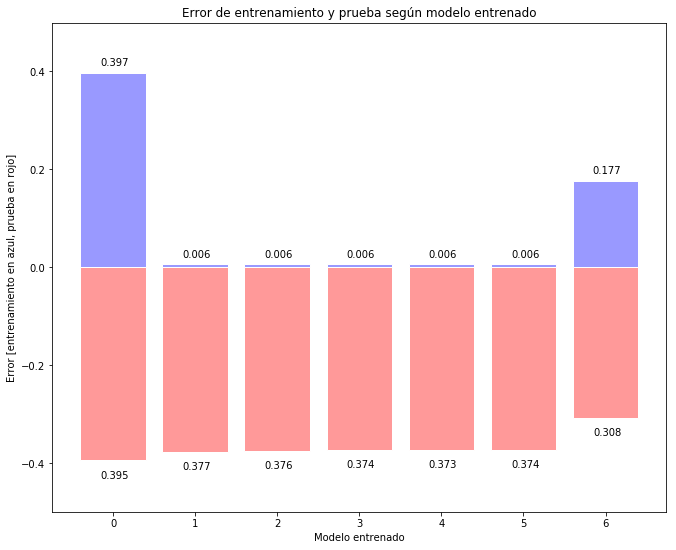

In [96]:
n = len(XALL)
X = np.arange(n)
fig = plt.figure(figsize=(11,9))
Y1 = YALLtrain 
Y2 = YALLtest 
for i in X:
    plt.bar(i, +Y1[i], facecolor='#9999ff', edgecolor='white')
    plt.bar(i, -Y2[i], facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, (Y1)):
    plt.text(x + 0.02, y + 0.01, '%.3f' % y, ha='center', va='bottom')
for x, y in zip(X, (Y2)):
    plt.text(x + 0.02, -y - 0.04, '%.3f' % y, ha='center', va='bottom')
    
plt.ylim(-0.5, +0.5)
plt.title("Error de entrenamiento y prueba según modelo entrenado")   
plt.xlabel("Modelo entrenado")  
plt.ylabel("Error [entrenamiento en azul, prueba en rojo]") 
plt.show()


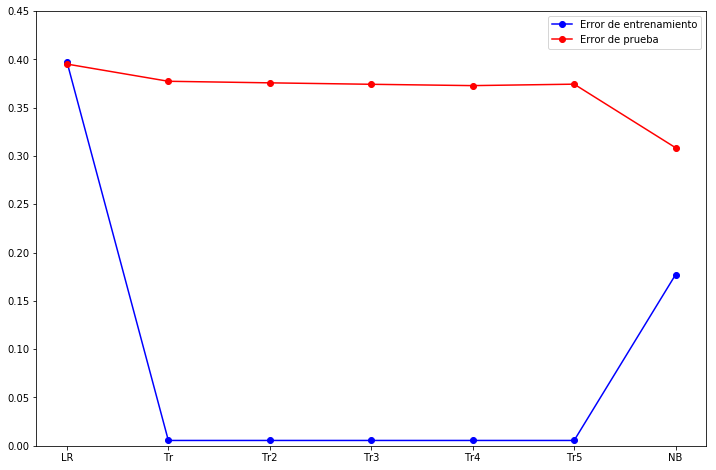

In [101]:
x_all= [1,2,3,4,5,6,7] #,8]
fig = plt.figure(figsize=(12,8))
plt.plot(x_all, YALLtrain, marker='o', color = 'b', label = "Error de entrenamiento")
plt.plot(x_all, YALLtest, marker='o', color = 'r', label = "Error de prueba")
plt.legend()
plt.xticks(x_all, XALL)
plt.ylim(0, +0.45)
plt.show()

#### g. Utilizar y explicar las métricas que calcula la función classification report de la librería sklearn. 

In [108]:
from sklearn.metrics import classification_report
def score_the_model(model,acc_tr, acc_test):
    print ("Training Accuracy: ", (acc_tr))
    print ("Test Accuracy: ", (acc_test))
    print ("Detailed Analysis Testing Results ...")
    print (classification_report(clasifications_test, model.predict(matrizTFTest), target_names=['+','-']))


In [112]:
print ("\n\n\nScore Logistic Regression\n")
score_the_model(LR,error_LR_entrenamiento, error_LR_prueba)
print ("\n\n\nScore Tree")
score_the_model(Tr,error_Tr_entrenamiento, error_Tr_prueba)
print ("\n\n\nScore Tree 2")
score_the_model(Tr2,error_Tr2_entrenamiento, error_Tr2_prueba)
print ("\n\n\nScore Tree 3")
score_the_model(Tr3,error_Tr3_entrenamiento, error_Tr3_prueba)
print ("\n\n\nScore Tree 4")
score_the_model(Tr4,error_Tr4_entrenamiento, error_Tr4_prueba)
print ("\n\n\nScore Tree 5")
score_the_model(Tr5,error_Tr5_entrenamiento, error_Tr5_prueba)
print ("\n\n\nScore Naive Bayes (multinomial)")
score_the_model(multi,error_multi_entrenamiento, error_multi_prueba)




Score Logistic Regression

Training Accuracy:  0.397498045348
Test Accuracy:  0.395015576324
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.78      0.17      0.29      3624
          -       0.59      0.96      0.73      4401

avg / total       0.67      0.60      0.53      8025




Score Tree
Training Accuracy:  0.00553557466771
Test Accuracy:  0.377196261682
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.58      0.58      0.58      3624
          -       0.65      0.66      0.66      4401

avg / total       0.62      0.62      0.62      8025




Score Tree 2
Training Accuracy:  0.00553557466771
Test Accuracy:  0.375576323988
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.59      0.58      0.58      3624
          -       0.66      0.66      0.66      4401

avg / total       0.62      0.62 

In [118]:
def score_the_model(model,acc_tr, acc_test):
    print ("Training Accuracy: ", (acc_tr))
    print ("Test Accuracy: ", (acc_test))
    print ("Detailed Analysis Testing Results ...")
    print (classification_report(clasifications_test, model.predict(MTFTestSVM), target_names=['+','-']))


In [119]:
print ("\n\n\nScore SVM\n")
score_the_model(svm,error_svm_entrenamiento, error_svm_prueba)
print ("\n\n\nScore SVM 2")
score_the_model(svm2,error_svm2_entrenamiento, error_svm2_prueba)
print ("\n\n\nScore SVM 3")
score_the_model(svm3,error_svm3_entrenamiento, error_svm3_prueba)
print ("\n\n\nScore SVM 3")
score_the_model(svm4,error_svm4_entrenamiento, error_svm4_prueba)





Score SVM

Training Accuracy:  0.0381875
Test Accuracy:  0.417196261682
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.53      0.64      0.58      3624
          -       0.64      0.54      0.58      4401

avg / total       0.59      0.58      0.58      8025




Score SVM 2
Training Accuracy:  0.3275
Test Accuracy:  0.548411214953
Detailed Analysis Testing Results ...


/etc/Anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          +       0.45      1.00      0.62      3624
          -       0.00      0.00      0.00      4401

avg / total       0.20      0.45      0.28      8025




Score SVM 3
Training Accuracy:  0.0053125
Test Accuracy:  0.394517133956
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.54      0.77      0.64      3624
          -       0.71      0.47      0.57      4401

avg / total       0.64      0.61      0.60      8025




Score SVM 3
Training Accuracy:  0.3275
Test Accuracy:  0.548411214953
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.45      1.00      0.62      3624
          -       0.00      0.00      0.00      4401

avg / total       0.20      0.45      0.28      8025



### ¿Cuáles clasificadores son los que mejor se comportan?

**Opcional** Visualizar las predicciones de algún modelo generativo (probabilístico) definido anteriormente,
tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el
clasificador a cada clase.

In [147]:
from random import randint
test_pred = multi.predict_proba(matrizTFTest)
print (test_pred)
print (multi.predict(matrizTFTest))
spl = randint(0,len(test_pred-16))#, 15)
print (spl)
for text, sentiment in zip(df_test.content[spl:spl+15], test_pred[spl:spl+15]):
    print (sentiment, text)

[[ 0.53355382  0.46644618]
 [ 0.41149369  0.58850631]
 [ 0.72990778  0.27009222]
 ..., 
 [ 0.72019051  0.27980949]
 [ 0.3166587   0.6833413 ]
 [ 0.05029345  0.94970655]]
[-1  1 -1 ..., -1  1  1]
6576
[ 0.08609062  0.91390938] Mm. Goodnight. Going to play Rock Band 2 'til it's time to watch SNL with Justin Timberlake.
[ 0.36519557  0.63480443] officially my birthday  so i guess after 21 the novelty of a birthday wears off..?
[ 0.50170132  0.49829868] @techstartups people still mail things?
[ 0.55426935  0.44573065] @AClockworkToad Im not getting any treatments, we are just gonna hang out at the pool and the hot tubs.
[ 0.19967185  0.80032815] @flomingo that sounds cool! post video!!
[ 0.44491222  0.55508778] Little bottle jus for me   http://mypict.me/FLC
[ 0.29224622  0.70775378] chilling at the casa
[ 0.57183865  0.42816135] @djskee not there but wish I were
[ 0.34875693  0.65124307] @dorzki good morning  good luck! Belive in you
[ 0.03422226  0.96577774] Happy mother`s day to your mo

#### i. Ahora deberá extender el problema a las múltiples clases que tiene presente (las distintas emociones), es decir, su trabajo será el de predecir una de las distintas emociones de cada tweet. Para esto utilice el mismo pre-procesamiento realizado en el punto c) y las caracter ́ısticas generadas mediante las t ́ecnicas en el punto e). Recuerde que tendr ́a que codificar las distintas clases como valores num ́ericos enteros.


In [ ]:
(j) Utilice los clasificadores que son extendidos por defecto a m ́
ultiples clases para detectar emociones en
cada tweet, muestre sus desempe ̃
nos a trav ́es del error de pruebas en un gr ́afico resumen.


In [ ]:
(k) Utilice clasificadores binarios que pueden ser extendidos a trav ́es de otras t ́ecnicas, tal como One vs
One y One vs All/Rest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#example
classif = OneVsRestClassifier(model)
classif.fit(X, Y)

In [ ]:
Para el caso de la Regresi ́
on Log ́ıstica compare sus dos m ́etodos para ser extendidos a m ́
ultiples clases.
Uno a trav ́es de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.


In [ ]:

LogisticRegression(multi_class='ovr')
LogisticRegression(multi_class='multinomial')

In [ ]:
(m) Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendi-
dos mediante otras t ́ecnicas, construya una tabla o gr ́afico resumen. Los clasificadores que mejor se
comportan en el caso binario ¿Siguen teniendo ese desempe ̃
no en m ́
ultiples clases?